<a href="https://colab.research.google.com/github/ADITYAS-7/ADITYAS-7/blob/main/B2BLoyalty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.8 MB/s eta 0:00:00


In [ ]:
!pip install pandas

In [ ]:
!pip install uuid

  Preparing metadata (setup.py) ... done
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6478 sha256=9b697949250ad95f9bde5f90fb98b20b7207bc9e91461829e47010051a4cd8df
  Stored in directory: /root/.cache/pip/wheels/e0/01/df/bd20df409bd81f8b99e6cd343c5f49731dc0a20eefefdafae0
Successfully built uuid


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker()
Faker.seed(1234)

# Number of transactions to simulate
n = 10000

# Define a list of banking products
banking_products = [
    'Savings Account',
    'Credit Card',
    'Loan',
    'Mortgage',
    'Checking Account',
    'Investment Account',
    'Business Account'
]

# Generate PANs and addresses once
pan_list = [fake.credit_card_number(card_type=None) for _ in range(n)]
address_list = [(fake.street_address(), fake.city(), fake.state(), fake.zipcode()) for _ in range(n)]

# Function to create the simulated dataset
def create_simulated_dataset(n):
    # Generate random transaction data
    data = {
        'Primary_Account_Number': pan_list,  # Use the same PAN list
        'Transaction_Amount': np.round(np.random.uniform(1.0, 1000.0, n), 2), # Transaction amounts between 1 and 1000
        'Transaction_Date_Time': pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2024-01-01', periods=1000), n)),
        'Point_of_Service_Code': np.random.choice(['01', '02', '05', '09', '80'], n), # Random POS codes (store, online, etc.)
        'Card_Sequence_Number': np.random.randint(1, 10, n), # Random card sequence number
        'Merchant_Type_Code': np.random.choice(['5411', '5812', '5999', '5912', '5814', '5541', '7011', '4111', '5311', '7299'], n), # MCC codes for various merchant types
        'Acquiring_Institution_ID': np.random.randint(100000, 999999, n), # Random acquiring institution ID
        'Approval_Code': np.random.randint(100000, 999999, n), # Simulate approval codes
        'Card_Acceptor_Terminal_ID': [fake.uuid4() for _ in range(n)], # Unique terminal IDs
        'Card_Acceptor_ID_Code': [fake.ein() for _ in range(n)], # Unique merchant EIN (as a proxy for acceptor ID)
        'Card_Acceptor_Name_Location': [f"{fake.company()}, {fake.city()}" for _ in range(n)], # Merchant name and city
        'Transaction_Currency_Code': np.random.choice(['840', '978', '826'], n), # Currency codes (USD, EUR, GBP)
        'Transaction_Life_Cycle_ID': np.random.randint(100000, 999999, n), # Random transaction life cycle IDs
        'Transaction_Destination_Institution_ID': np.random.randint(100000, 999999, n), # Destination institution ID
        'Transaction_Originator_Institution_ID': np.random.randint(100000, 999999, n), # Originator institution ID
        'Purchase_Time': [fake.time() for _ in range(n)], # Random transaction times
        'Customer_Reference': [fake.uuid4() for _ in range(n)], # Unique reference IDs
        'Banking_Products': [', '.join(np.random.choice(banking_products, size=np.random.randint(1, 4), replace=False)) for _ in range(n)], # Random banking products
        'Street_Address': [address[0] for address in address_list], # Street address
        'City': [address[1] for address in address_list], # City
        'State': [address[2] for address in address_list], # State
        'ZIP_Code': [address[3] for address in address_list], # ZIP code
    }

    # Convert to DataFrame
    df = pd.DataFrame(data)

    return df

# Create the dataset
simulated_data = create_simulated_dataset(n)

# Save to CSV (Optional for further usage)
simulated_data.to_csv('customer_banking_dataset.csv', index=False)

# Display the first few rows of the dataset
simulated_data.head(10000)


,Primary_Account_Number,Transaction_Amount,Transaction_Date_Time,Point_of_Service_Code,Card_Sequence_Number,Merchant_Type_Code,Acquiring_Institution_ID,Approval_Code,Card_Acceptor_Terminal_ID,Card_Acceptor_ID_Code,...,Transaction_Life_Cycle_ID,Transaction_Destination_Institution_ID,Transaction_Originator_Institution_ID,Purchase_Time,Customer_Reference,Banking_Products,Street_Address,City,State,ZIP_Code
0,30101901153007,775.87,2023-04-08 13:15:40.540540540,05,8,5814,519919,697862,dd882ab1-7abe-4988-877f-b94935b96f49,13-5348448,...,985648,526036,787596,04:24:21,7e544f3e-d196-4c75-af0a-96e9660d8ace,"Loan, Credit Card, Business Account",4510 Williams Rue Suite 700,North Anntown,Illinois,33096
1,589797212109,306.12,2023-06-30 03:00:10.810810810,80,8,5812,234884,196798,84194fa5-0c4f-4dec-8efc-4326ea0e41ce,20-9922466,...,803349,889179,178348,08:10:21,82f758c9-a8f4-4cd9-8cd4-ca3ed2f878b7,"Credit Card, Loan, Savings Account",0139 Grace Turnpike,Port Denise,Montana,12655
2,180031871918907,648.47,2023-01-11 23:03:47.027027027,80,7,5999,391578,744837,fb252ab6-da51-4719-b4e0-2aa018240179,71-4045509,...,796160,137303,952123,06:26:59,feb274c5-d3c4-4056-8449-edf2dcea005c,Investment Account,8332 Jerry Mountain,Michaelside,Illinois,31321
3,4475433780810527626,727.17,2023-09-24 17:12:04.324324324,05,2,5812,364039,651838,cc7e0a49-892a-41a8-a6bc-f328fb18d0e7,04-0477753,...,433562,460428,918272,00:30:41,aab300f3-395a-450f-96da-2dc005753197,"Loan, Mortgage, Checking Account",27808 Ernest Shoals Suite 501,South Jerometon,Georgia,96901
4,502097218320,850.89,2023-01-15 05:58:55.135135135,80,8,5812,538539,625982,9153538c-b3b9-4de2-8279-8fb9dcd2559c,48-7507260,...,877824,950559,168285,20:21:29,fe028503-aa21-4bc9-b3b2-16a033845cad,"Mortgage, Credit Card, Savings Account",4957 Tucker Extensions,New Rickberg,Oregon,04076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4469003630012,964.60,2023-01-02 19:50:37.837837837,01,6,5999,234470,365066,5e6cfe1c-f42e-4145-b38a-cdd15483527d,34-5749490,...,217658,791088,111981,22:10:27,f69f467e-bfb2-46a5-84b3-0c860f579438,Mortgage,521 Austin Walks Suite 969,West Kevinfurt,New Jersey,40617
9996,180005515506393,332.59,2023-11-07 13:27:12.432432432,80,8,5814,950835,823266,be4985bf-a33d-42c3-a061-f88193d1f162,53-5151614,...,508331,417642,777831,02:04:23,39f3174e-b0c6-4533-9668-8973851e0b06,Savings Account,1528 Vega Avenue,Kellyfort,New Mexico,93582
9997,341115935774517,909.23,2023-10-04 22:43:36.216216216,01,8,5411,422869,370074,535fd5b4-8b19-4a3b-944c-d9f3c59cc2b2,34-0758468,...,253811,583918,931886,13:48:57,957e0248-e42d-403c-a26c-61929b9dbe42,"Investment Account, Savings Account, Mortgage",37629 Fox Hollow,South Rebecca,Idaho,53599
9998,060478126273,985.31,2023-01-31 16:34:35.675675675,80,1,5411,573850,607478,7f4c6382-d82e-410c-afd3-631b72522cdf,33-2096159,...,620257,501954,372967,15:00:07,a5654836-ed06-4b46-8410-49a959ca3ac4,"Checking Account, Credit Card, Investment Account",354 Walter Walk Apt. 911,Port Brittneychester,Texas,92122


In [ ]:
import json
import pandas as pd
import numpy as np
import uuid
from faker import Faker

fake = Faker()
Faker.seed(1234)

num_customers = 10000

# Total number of transactions to simulate
n = 110000


def generate_ipm_json(num_customers, n):
    ipm_data = []
    transactions_per_customer = np.random.randint(8, 20, size=num_customers)  # Between 8 and 20 transactions per customer
    transaction_count = 0

    for customer_idx, pan in enumerate(pan_list):
        for _ in range(transactions_per_customer[customer_idx]):
            if transaction_count >= n:  # Ensure we don't exceed the total transaction limit
                break
            transaction = {
                "mti": "1240",  # Example Message Type Indicator
                "de2": pan,  # Use the PAN as the customer ID
                "de4": f"{np.random.randint(1, 1000000):012}",  # Transaction Amount
                "de12": {  # Date and Time, Local Transaction
                    "s1": fake.date(pattern="%y%m%d"),  # Date
                    "s2": fake.time(pattern="%H%M%S"),  # Time
                },
                "de22": {
                    "s1": "0", "s2": "0", "s3": "0", "s4": "0", "s5": "5",
                    "s6": "0", "s7": "S", "s8": "0", "s9": "0", "s10": "0",
                    "s11": "0", "s12": "0",
                },
                "de23": f"{np.random.randint(1, 999):03}",  # Card Sequence Number
                "de26": np.random.choice(["5411", "5812", "5999", "5912", "5814"]),  # MCC
                "de32": f"{np.random.randint(100000, 999999)}",  # Acquiring Institution ID
                "de38": f"{np.random.randint(100000, 999999)}",  # Approval Code
                "de41": str(uuid.UUID(fake.uuid4()))[:8],  # Terminal ID
                "de42": fake.ein(),  # Merchant Acceptor ID
                "de43": {  # Merchant Name/Location
                    "s1": fake.company(),
                    "s2": address_list[customer_idx][0],  # Street Address
                    "s3": address_list[customer_idx][1],  # City
                    "s4": address_list[customer_idx][3],  # ZIP Code
                    "s5": "   ",  # Optional Subdivision Code
                    "s6": fake.country_code(),
                },
                "de49": np.random.choice(["840", "978", "826"]),  # Currency Code
                "de63": {  # Transaction Life Cycle ID
                    "s1": " ",  # Life Cycle Indicator
                    "s2": fake.uuid4()[:15],  # Trace ID
                },
                "de93": f"{np.random.randint(100000, 999999)}",  # Destination Institution ID
                "de94": f"{np.random.randint(100000, 999999)}",  # Originator Institution ID
                "pds0621": fake.time(),  # Purchase Time
                "pds0660": fake.uuid4(),  # Customer Reference
            }
            ipm_data.append(transaction)
            transaction_count += 1
            if transaction_count >= n:  # Ensure the total transaction limit is not exceeded
                break
    return ipm_data

# Generate and save the data as JSON
ipm_transactions = generate_ipm_json(num_customers, n)

# Save to a JSON file
with open('ipm_transactions.json', 'w') as f:
    json.dump(ipm_transactions, f, indent=4)

print(json.dumps(ipm_transactions[99999], indent=4))


{
    "mti": "1240",
    "de2": "30414145199532",
    "de4": "000000393397",
    "de12": {
        "s1": "770324",
        "s2": "045833"
    },
    "de22": {
        "s1": "0",
        "s2": "0",
        "s3": "0",
        "s4": "0",
        "s5": "5",
        "s6": "0",
        "s7": "S",
        "s8": "0",
        "s9": "0",
        "s10": "0",
        "s11": "0",
        "s12": "0"
    },
    "de23": "387",
    "de26": "5814",
    "de32": "544667",
    "de38": "188664",
    "de41": "6c946e55",
    "de42": "33-9155014",
    "de43": {
        "s1": "Martinez Ltd",
        "s2": "84243 Stephanie Prairie Apt. 931",
        "s3": "Patriciafurt",
        "s4": "65152",
        "s5": "   ",
        "s6": "FR"
    },
    "de49": "978",
    "de63": {
        "s1": " ",
        "s2": "aceaf04d-2025-4"
    },
    "de93": "200302",
    "de94": "650498",
    "pds0621": "06:02:14",
    "pds0660": "cf0ffd64-81ad-4c82-8608-c4d84b6c71ad"
}


In [ ]:
import pandas as pd

df_csv = pd.read_csv('/content/simulated_customers.csv')

df_json = pd.read_json('/content/ipm_transactions.json')

df_json.rename(columns={'de2': 'Primary_Account_Number'}, inplace=True)

merged_df = pd.merge(df_csv, df_json, on='Primary_Account_Number', how='inner')

merged_df.to_csv('/content/merged_dataset.csv', index=False)

print(merged_df.head())


   Primary_Account_Number  Transaction_Amount          Transaction_Date_Time  \
0          30101901153007              988.64  2023-02-04 17:01:58.918918919   
1          30101901153007              988.64  2023-02-04 17:01:58.918918919   
2          30101901153007              988.64  2023-02-04 17:01:58.918918919   
3          30101901153007              988.64  2023-02-04 17:01:58.918918919   
4          30101901153007              988.64  2023-02-04 17:01:58.918918919   

   Point_of_Service_Code  Card_Sequence_Number  Merchant_Type_Code  \
0                      2                     3                5814   
1                      2                     3                5814   
2                      2                     3                5814   
3                      2                     3                5814   
4                      2                     3                5814   

   Acquiring_Institution_ID  Approval_Code  \
0                    355855         193601   
1     

In [ ]:
import json
import numpy as np
import uuid
from faker import Faker

fake = Faker()
Faker.seed(1234)

# Number of unique customers (PANs)
num_customers = 10000

# Total number of transactions to simulate
n = 110000

def generate_ipm_json(num_customers, n):
    ipm_data = []
    transactions_per_customer = np.random.randint(8, 20, size=num_customers)  # Between 8 and 20 transactions per customer
    transaction_count = 0
    customer_transactions = []

    for customer_idx in range(num_customers):
        customer_transactions.append(transactions_per_customer[customer_idx])
        for _ in range(transactions_per_customer[customer_idx]):
            if transaction_count >= n:
                break
            transaction = {
                "mti": "1240",  # Example Message Type Indicator
                "de2": fake.uuid4(),  # Use the PAN as the customer ID
                "de4": f"{np.random.randint(1, 1000000):012}",  # Transaction Amount
                "de12": {  # Date and Time, Local Transaction
                    "s1": fake.date(pattern="%y%m%d"),  # Date
                    "s2": fake.time(pattern="%H%M%S"),  # Time
                },
                "de22": {
                    "s1": "0", "s2": "0", "s3": "0", "s4": "0", "s5": "5",
                    "s6": "0", "s7": "S", "s8": "0", "s9": "0", "s10": "0",
                    "s11": "0", "s12": "0",
                },
                # Other fields...
            }
            ipm_data.append(transaction)
            transaction_count += 1
            if transaction_count >= n:
                break
    return ipm_data, customer_transactions

# Generate and save the data as JSON
ipm_transactions, customer_transactions = generate_ipm_json(num_customers, n)

# Save to a JSON file
with open('ipm_transactions.json', 'w') as f:
    json.dump(ipm_transactions, f, indent=4)

customers_with_8_to_20_transactions = [t for t in customer_transactions if 8 <= t <= 20]
coverage = len(customers_with_8_to_20_transactions) / num_customers


print(f"Proportion of customers with 8-20 transactions: {coverage * 100:.2f}%")

# Verify if the coverage meets the 93% target
if coverage >= 0.93:
    print("Coverage is within the desired range (>= 93%).")
else:
    print("Coverage is below the desired range (>= 93%).")


Proportion of customers with 8-20 transactions: 100.00%
10000


In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

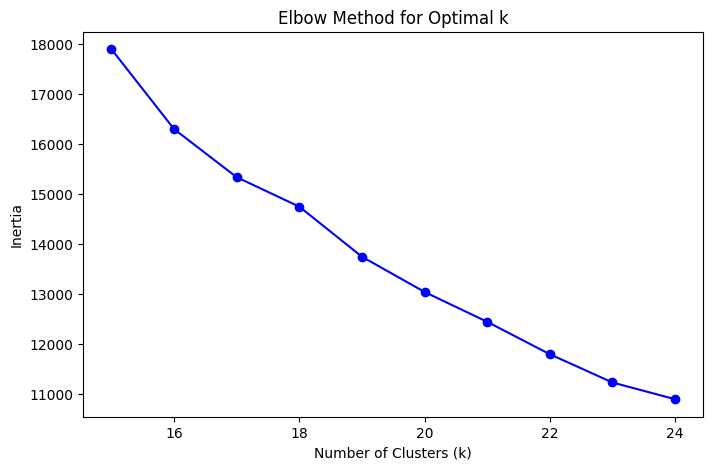

[[ 1.29397254  0.90005185]
 [-0.75524196  0.00953666]
 [-0.4635157   2.81318395]
 [ 0.04672432 -1.43495566]
 [ 0.71620957  0.17013381]
 [ 0.31385497  1.27337599]
 [-1.40234431  0.51811462]
 [ 1.29596952 -1.17493957]
 [-0.57970692  0.93765188]
 [-1.41004274 -0.3813959 ]
 [-1.28655776 -1.27587575]
 [ 1.40103788 -0.24415647]
 [-1.20840166  1.66146177]
 [ 0.67642624 -0.70874252]
 [ 0.03137528 -0.42248607]
 [ 1.06798278  2.34880618]
 [-0.05906043  0.31511449]
 [-0.64199881 -0.78682747]]


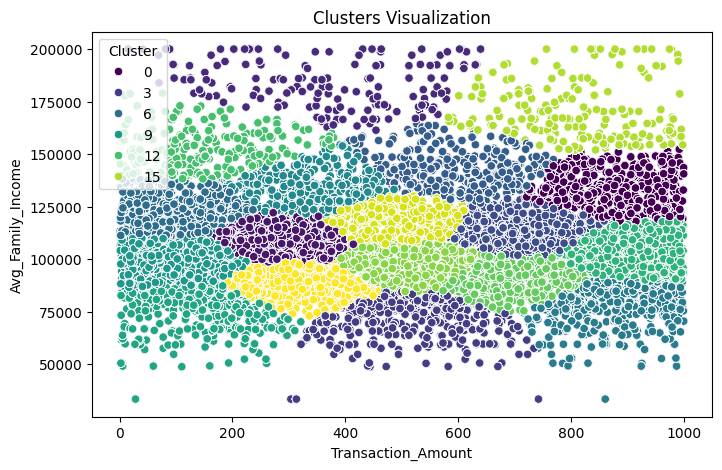

         Transaction_Amount_Mean  Avg_Family_Income_Mean  \
Cluster                                                    
0                     876.920311           132716.550886   
1                     289.370832           109116.034307   
2                     372.544428           183021.139430   
3                     519.149388            71063.961864   
4                     711.983333           113390.960965   
5                     595.665991           142458.786254   
6                     103.518399           122532.189707   
7                     877.553306            77964.094019   
8                     339.833138           133477.620208   
9                     100.871467            98867.998397   
10                    136.314224            75305.185185   
11                    907.845168           102508.613421   
12                    159.094693           152658.771632   
13                    699.865074            90235.639229   
14                    514.693399        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score





df = pd.read_csv('/content/final_dataset.csv') # loading the dataset

print(df.isnull().sum()) # checking for null values


features = df[['Transaction_Amount', 'Avg_Family_Income' ]]  # Example columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


inertia = []
K = range(15, 25)  # Test clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


kmeans = KMeans(n_clusters= 18, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Transaction_Amount'], y=df['Avg_Family_Income'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters Visualization')
plt.show()



cluster_summary = df.groupby('Cluster').agg({
    'Transaction_Amount': 'mean',
    'Avg_Family_Income': ['mean', 'min', 'max'],
})

cluster_summary.columns = ['Transaction_Amount_Mean', 'Avg_Family_Income_Mean', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max']

print(cluster_summary)

# Sil Score
sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

In [ ]:
import pandas as pd

df_sa2_csv1 = pd.read_csv('/content/2023-census-household.csv')

df_sa2_csv2 = pd.read_csv('/content/2023-census-family.csv')

merged_sa2_df = pd.merge(df_sa2_csv1, df_sa2_csv2, on='SA2_ID', how='inner')

merged_sa2_df.to_csv('/content/merged_SA2_dataset.csv', index=False)

print(merged_sa2_df.head())


   SA2_ID             SA2_NAME  Avg_Vehicles  Total_Vehicles  \
0  187600                Tiroa             3              30   
1  223400             Mowhanau             2            1041   
2  101801            Whakarara             2             726   
3  174701               Okauia             2             750   
4  256600  Homebush-Te Ore Ore             2            1011   

   Total_People_Stated  Avg_Family_Members  Avg_Family_Income  
0                   12                   2              65700  
1                  465                   3             103700  
2                  390                   3              65300  
3                  342                   3             112400  
4                  411                   3             113400  


In [ ]:
import pandas as pd

merged_SA2_dataset = pd.read_csv('/content/merged_SA2_dataset.csv')
df_sa2_csv = pd.read_csv('/content/NZDep2023.csv')

final_merged_sa2_df = pd.merge(merged_SA2_dataset, df_sa2_csv, on='SA2_ID', how='outer')

final_merged_sa2_df.to_csv('/content/final_merged_SA2_dataset.csv', index=False)

null_sa2_df = final_merged_sa2_df[final_merged_sa2_df[['Dep_Score', 'Avg_Dep_Score']].isnull().any(axis=1)]

null_sa2_df = null_sa2_df[['SA2_ID', 'SA2_NAME']]

print(null_sa2_df.head())
# Count the number of null values in Dep_Score and Avg_Dep_Score
null_count = final_merged_sa2_df[['Dep_Score', 'Avg_Dep_Score']].isnull().any(axis=1).sum()

print(f"Total number of rows with null values in 'Dep_Score' or 'Avg_Dep_Score': {null_count}")

# Drop rows where Dep_Score or Avg_Dep_Score is null
final_merged_sa2_df = final_merged_sa2_df.dropna(subset=['Dep_Score', 'Avg_Dep_Score'])

# Verify if null values are removed
print(final_merged_sa2_df.isnull().sum())  # Should show 0 for these columns
final_merged_sa2_df.to_csv('/content/final_merged_SA2_dataset.csv', index=False)




      SA2_ID                           SA2_NAME
1656  258900       Islands Bay of Plenty Region
1716  306401  Marlborough Sounds Coastal Marine
1921  326400                    Addington North
Total number of rows with null values in 'Dep_Score' or 'Avg_Dep_Score': 3
SA2_ID                 0
SA2_NAME               0
Avg_Vehicles           0
Total_Vehicles         0
Total_People_Stated    0
Avg_Family_Members     0
Avg_Family_Income      0
Dep_Score              0
Avg_Dep_Score          0
dtype: int64


In [ ]:
import pandas as pd

merged_SA2_dataset = pd.read_csv('/content/merged_SA2_dataset.csv')
df_sa2_excel = pd.read_excel('/content/NZDep2023.xlsx')

df_sa2_excel.rename(columns={'SA2_average_NZDep2023': 'Dep_Score', 'SA2_average_NZDep2023_score': 'Avg_Dep_Score'}, inplace=True)

final_merged_sa2_df = pd.merge(merged_SA2_dataset, df_sa2_excel, on='SA2_ID', how='outer')

final_merged_sa2_df.to_csv('/content/final_merged_SA2_dataset.csv', index=False)

In [ ]:
# allotting each customer record in the customer banking dataset with a random SA2 ID in the final merged sa2 dataset


import random


customer_banking_df = pd.read_csv('/content/customer_banking_dataset.csv')
final_merged_sa2_df = pd.read_csv('/content/final_merged_SA2_dataset.csv')

customer_banking_df['SA2_ID'] = random.choices(final_merged_sa2_df['SA2_ID'], k=len(customer_banking_df))

customer_banking_df.to_csv('/content/customer_banking_dataset_with_SA2.csv', index=False)


# merge the new customer banking dataset with the final merged sa2 for other factors (vehicles, family etc) and obtain a complete customer dataset

final_customer_df =  customer_banking_df.merge(final_merged_sa2_df, on='SA2_ID', how='left')

final_customer_df.to_csv('/content/final_customer_dataset.csv', index=False)


In [ ]:
import pandas as pd

df_csv = pd.read_csv('/content/final_customer_dataset.csv')

df_json = pd.read_json('/content/ipm_transactions.json')

df_json.rename(columns={'de2': 'Primary_Account_Number'}, inplace=True)

merged_df = pd.merge(df_csv, df_json, on='Primary_Account_Number', how='inner')

merged_df.to_csv('/content/final_dataset.csv', index=False)

print(merged_df.head())


   Primary_Account_Number  Transaction_Amount          Transaction_Date_Time  \
0          30101901153007              775.87  2023-04-08 13:15:40.540540540   
1          30101901153007              775.87  2023-04-08 13:15:40.540540540   
2          30101901153007              775.87  2023-04-08 13:15:40.540540540   
3          30101901153007              775.87  2023-04-08 13:15:40.540540540   
4          30101901153007              775.87  2023-04-08 13:15:40.540540540   

   Point_of_Service_Code  Card_Sequence_Number  Merchant_Type_Code  \
0                      5                     8                5814   
1                      5                     8                5814   
2                      5                     8                5814   
3                      5                     8                5814   
4                      5                     8                5814   

   Acquiring_Institution_ID  Approval_Code  \
0                    519919         697862   
1     

Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

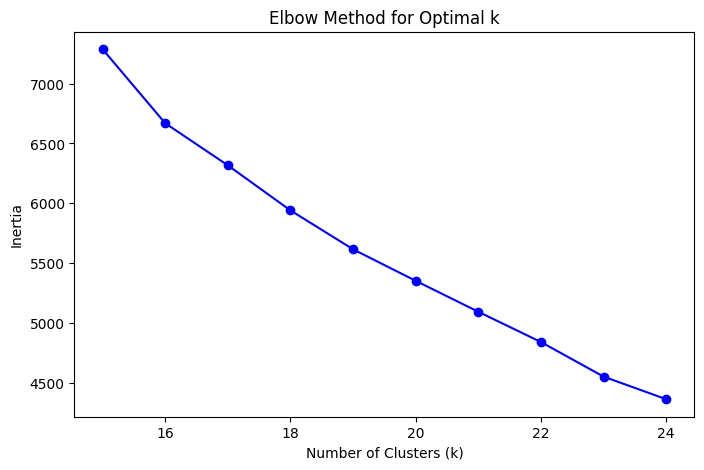

Cluster Centers:
[[ 0.78602944 -0.39607851]
 [-0.59197209  0.58042521]
 [-1.6969613  -2.96148772]
 [-1.22378143  2.32633498]
 [ 0.72271868  0.14091546]
 [ 0.10233215  0.06493427]
 [ 1.43988976 -0.65087358]
 [ 0.08734736 -0.45859056]
 [-1.27702288  1.42243846]
 [-1.1582237   0.28134168]
 [ 0.07876614  0.64493481]
 [-0.49205244  1.3401032 ]
 [-0.51648174  0.03093574]
 [-1.18157494  0.81599861]
 [ 1.31247565 -0.23648072]
 [ 1.4690767  -1.13647195]]


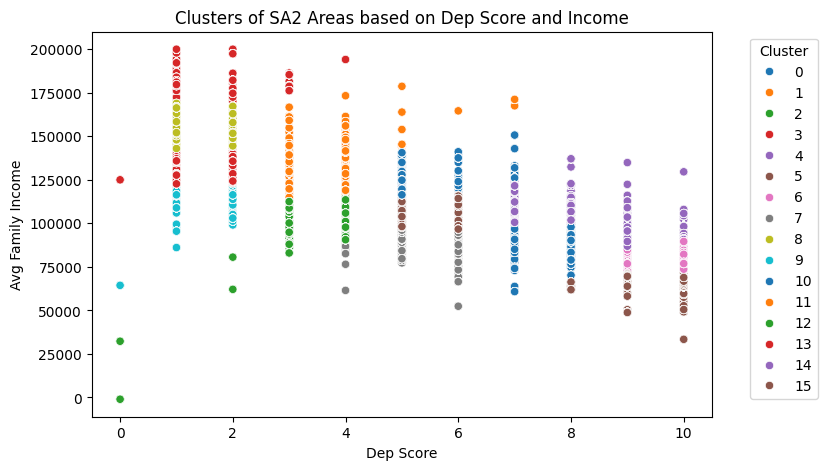

Inertia: [7286.232774058191, 6668.769462736773, 6317.284818381463, 5941.1850411099795, 5616.493071015567, 5353.597724993134, 5095.33782533652, 4842.602424563356, 4554.1439241061735, 4365.576189359023]
Silhouette Score: 0.4087909701619151
         Avg_Family_Income_Mean  Avg_Family_Income_Min  Avg_Family_Income_Max  \
Cluster                                                                         
0                  89428.593678                  60800                  99400   
1                 123811.341463                 113700                 137900   
2                   -899.600000                   -999                  32300   
3                 185284.916582                 170200                 200000   
4                 108336.179863                  98300                 137100   
5                 105669.930070                  96400                 116000   
6                  80457.246127                  71900                  89700   
7                  87245.152198  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/final_dataset.csv')

# Check for null values
print(df.isnull().sum())

features = df[['Dep_Score', 'Avg_Family_Income']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(15, 25)  # Test clusters from 15 to 25
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()




optimal_k = 16

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize clusters using scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Dep_Score'], y=df['Avg_Family_Income'], hue=df['Cluster'], palette="tab10", marker='o')
plt.title('Clusters of SA2 Areas based on Dep Score and Income')
plt.xlabel('Dep Score')
plt.ylabel('Avg Family Income')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

df.to_csv('/content/clustered_data.csv', index=False)




sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

# Compute cluster summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Income': ['mean', 'min', 'max'],
    'Dep_Score': 'mean'
})

cluster_summary.columns = ['Avg_Family_Income_Mean', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max', 'Dep_Score_Mean']

print(cluster_summary)

Primary_Account_Number                       0
Transaction_Amount                           0
Transaction_Date_Time                        0
Point_of_Service_Code                        0
Card_Sequence_Number                         0
Merchant_Type_Code                           0
Acquiring_Institution_ID                     0
Approval_Code                                0
Card_Acceptor_Terminal_ID                    0
Card_Acceptor_ID_Code                        0
Card_Acceptor_Name_Location                  0
Transaction_Currency_Code                    0
Transaction_Life_Cycle_ID                    0
Transaction_Destination_Institution_ID       0
Transaction_Originator_Institution_ID        0
Purchase_Time                                0
Customer_Reference                           0
Banking_Products                             0
Street_Address                               0
City                                         0
State                                        0
ZIP_Code     

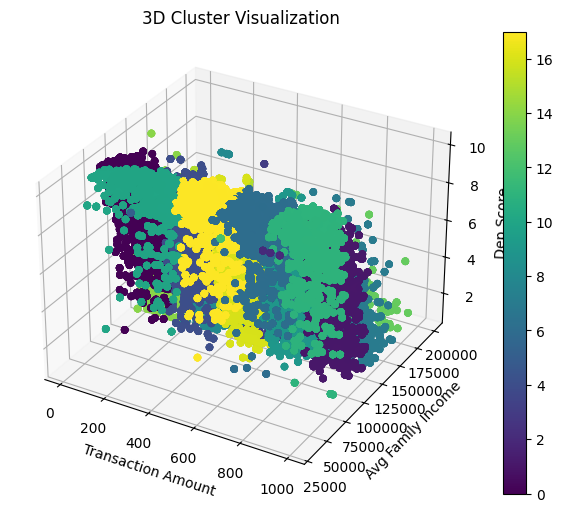

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



df = pd.read_csv('/content/final_dataset.csv') # loading the dataset

print(df.isnull().sum()) # checking for null values


features = df[['Transaction_Amount', 'Avg_Family_Income' ]]  # Example columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)




kmeans = KMeans(n_clusters= 18, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Transaction_Amount'], df['Avg_Family_Income'], df['Dep_Score'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Avg Family Income')
ax.set_zlabel('Dep Score')
plt.title('3D Cluster Visualization')
plt.colorbar(scatter)
plt.show()



Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

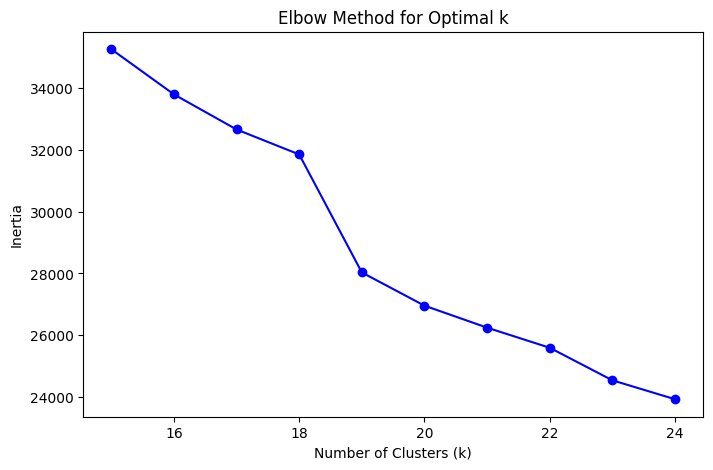

[[-1.1299141   0.00893802  0.12744805]
 [ 1.0962542   0.82235227 -0.99839857]
 [ 0.01756374 -0.1977213   0.7510364 ]
 [-0.0048468  -2.96148772 -1.6969613 ]
 [-1.14335451  0.76461365 -0.93371048]
 [-0.13728335  1.92484667 -1.16964267]
 [ 1.14759867  0.04043461  0.1738181 ]
 [-1.03089284 -0.59325783  1.27900785]
 [ 1.00508385 -0.63454879  1.30215141]
 [ 0.00561102  0.35031096 -0.59679986]]


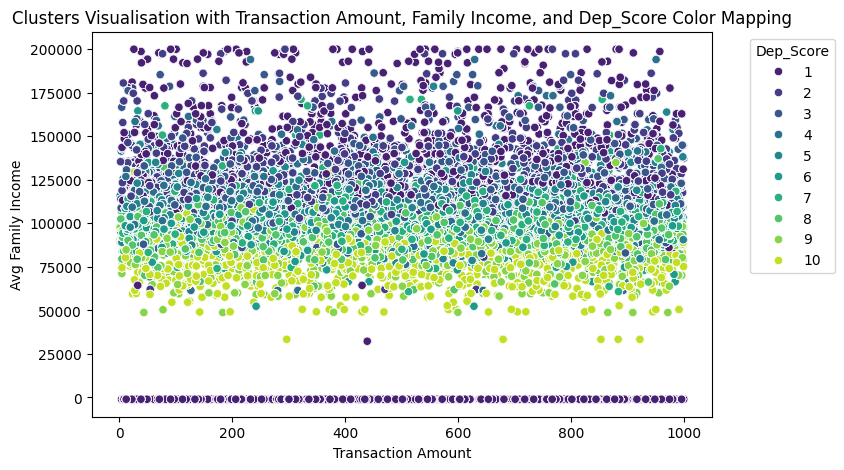

         Transaction_Amount_Mean  Avg_Family_Income_Mean  \
Cluster                                                    
0                     180.847967           103714.796816   
1                     820.068982           132199.408115   
2                     510.328160            96433.543173   
3                     504.109242             -899.600000   
4                     177.295137           130437.394790   
5                     470.060552           171198.245956   
6                     834.830477           104760.184971   
7                     209.661197            82485.899457   
8                     793.511961            81025.421664   
9                     507.110359           115709.006320   

         Avg_Family_Income_Min  Avg_Family_Income_Max  Dep_Score_Mean  
Cluster                                                                
0                        61500                 150700        5.585337  
1                        86100                 194100        2.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

features = df[['Transaction_Amount', 'Avg_Family_Income', 'Dep_Score']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(15, 25)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

#  Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(kmeans.cluster_centers_)

df['Dep_Score_Binned'] = pd.cut(df['Dep_Score'], bins=10, labels=np.arange(1, 11))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Transaction_Amount'], y=df['Avg_Family_Income'], hue=df['Dep_Score_Binned'], palette="viridis", marker='o')
plt.title('Clusters Visualisation with Transaction Amount, Family Income, and Dep_Score Color Mapping')
plt.xlabel('Transaction Amount')
plt.ylabel('Avg Family Income')
plt.legend(title='Dep_Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

cluster_summary = df.groupby('Cluster').agg({
    'Transaction_Amount': 'mean',
    'Avg_Family_Income': ['mean', 'min', 'max'],
    'Dep_Score': 'mean'
})

cluster_summary.columns = ['Transaction_Amount_Mean', 'Avg_Family_Income_Mean', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max', 'Dep_Score_Mean']

print(cluster_summary)

# Sil Score
sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")


Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

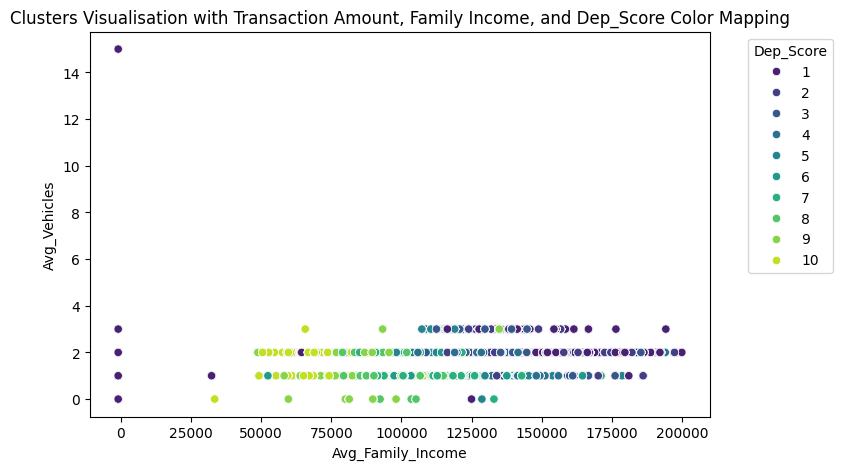

         Avg_Vehicles_Mean  Avg_Family_Income_Mean  Avg_Family_Income_Min  \
Cluster                                                                     
0                 1.914273            96038.117295                  52400   
1                 2.066963           118176.304400                  64400   
2                15.000000             -999.000000                   -999   
3                 1.778907            73369.018660                  33400   
4                 1.964354           179360.123574                 161200   
5                 2.069325           143578.352805                 130800   
6                 2.027287           118408.355158                 102800   
7                 1.838700           120612.094966                 108000   
8                 1.869515            93679.272306                  76600   
9                 1.965444            94815.790867                   -999   

         Avg_Family_Income_Max  Dep_Score_Mean  
Cluster                   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

features = df[['Avg_Family_Income', 'Avg_Vehicles', 'Dep_Score']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(kmeans.cluster_centers_)

df['Dep_Score_Binned'] = pd.cut(df['Dep_Score'], bins=10, labels=np.arange(1, 11))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Avg_Vehicles'], hue=df['Dep_Score_Binned'], palette="viridis", marker='o')
plt.title('Clusters Visualisation with Transaction Amount, Family Income, and Dep_Score Color Mapping')
plt.xlabel('Avg_Family_Income')
plt.ylabel('Avg_Vehicles')
plt.legend(title='Dep_Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# CLUSTER SUMMARY

cluster_summary = df.groupby('Cluster').agg({
    'Avg_Vehicles': 'mean',
    'Avg_Family_Income': ['mean', 'min', 'max'],
    'Dep_Score': 'mean'
})

cluster_summary.columns = ['Avg_Vehicles_Mean', 'Avg_Family_Income_Mean', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max', 'Dep_Score_Mean']

print(cluster_summary)



Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

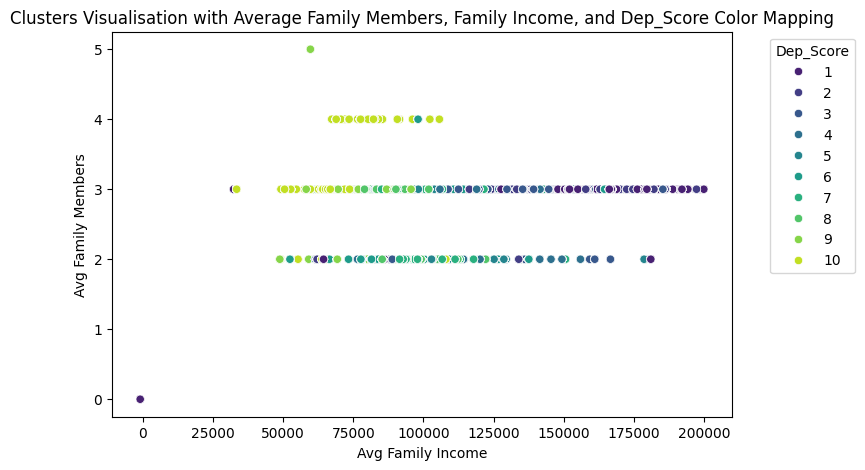

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

features = df[['Avg_Family_Income', 'Avg_Family_Members', 'Dep_Score']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(kmeans.cluster_centers_)

# Create a color mapping for Dep_Score (0 to 10)
df['Dep_Score_Binned'] = pd.cut(df['Dep_Score'], bins=10, labels=np.arange(1, 11))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Avg_Family_Members'], hue=df['Dep_Score_Binned'], palette="viridis", marker='o')
plt.title('Clusters Visualisation with Average Family Members, Family Income, and Dep_Score Color Mapping')
plt.xlabel('Avg Family Income')
plt.ylabel('Avg Family Members')
plt.legend(title='Dep_Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

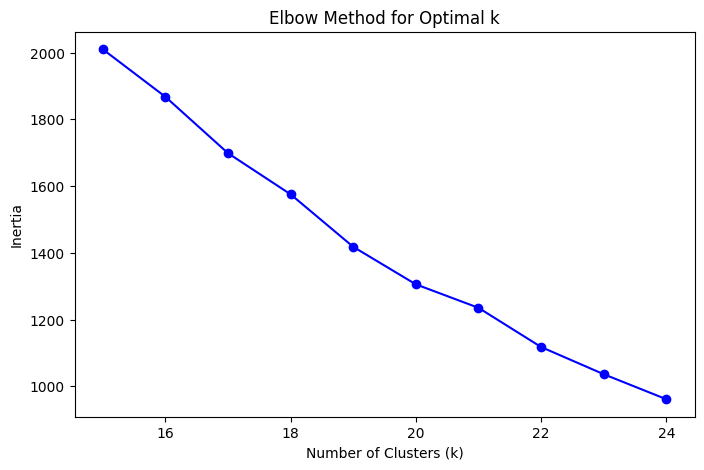

Cluster Centers:
[[-0.13907732  0.85638853]
 [ 4.40083022 -2.96431078]
 [-0.19878552 -0.24972659]
 [-0.19954875 -0.79851203]
 [-0.25922259  2.09358645]
 [-0.18659524  0.25080576]
 [-0.19954875 -0.50844765]
 [-0.52963412 -2.58041951]
 [-0.17588102  2.62752081]
 [-0.22360658  1.61847089]
 [-0.17913045  0.52510701]
 [-0.58016078 -0.46024062]
 [-0.19791747  0.00556654]
 [-0.56005462 -1.00096821]
 [-0.56436015  0.05871079]
 [-0.20809964  1.18745753]
 [-0.2097794  -1.20736383]
 [-0.58861334  0.66728297]]


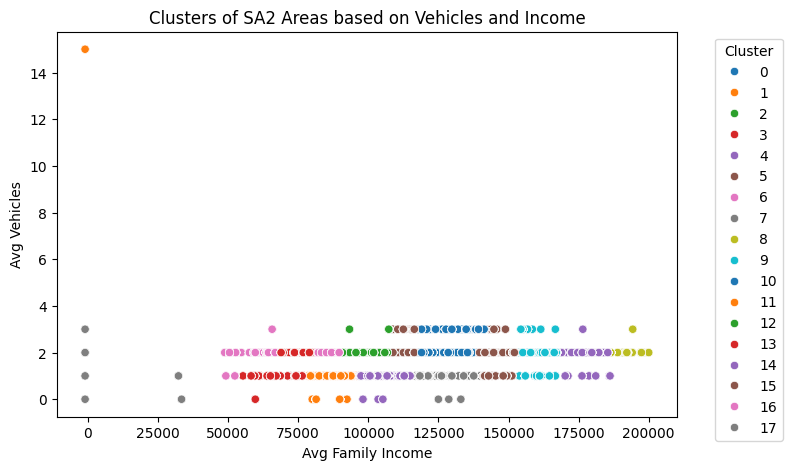

Inertia: [2010.1413385806684, 1867.6612059642327, 1698.6486753798142, 1575.336231674171, 1417.9228304669673, 1305.5069701990276, 1235.135331454197, 1117.6743789018487, 1036.1048592860634, 961.1690179929467]
Silhouette Score: 0.5160470233449176
         Avg_Vehicles_Mean  Avg_Family_Income_Mean  Avg_Family_Income_Min  \
Cluster                                                                     
0                 2.169897           133495.532646                 127000   
1                15.000000             -999.000000                   -999   
2                 2.002209            94472.987587                  90100   
3                 2.000000            75287.731788                  68700   
4                 1.831370           177089.828694                 168900   
5                 2.036651           112075.155033                 107900   
6                 2.000000            85472.070312                  80500   
7                 1.067227            12517.831933             

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

features = df[['Avg_Vehicles', 'Avg_Family_Income']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal K using the Elbow Method
inertia = []
K = range(15, 25)  # Test clusters from 15 to 25
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()




optimal_k = 18

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Avg_Vehicles'], hue=df['Cluster'], palette="tab10", marker='o')
plt.title('Clusters of SA2 Areas based on Vehicles and Income')
plt.xlabel('Avg Family Income')
plt.ylabel('Avg Vehicles')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

# Compute cluster summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'Avg_Vehicles': 'mean',
    'Avg_Family_Income': ['mean', 'min', 'max'],
    'Dep_Score': 'mean'
})

cluster_summary.columns = ['Avg_Vehicles_Mean', 'Avg_Family_Income_Mean', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max', 'Dep_Score_Mean']

print(cluster_summary)



Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

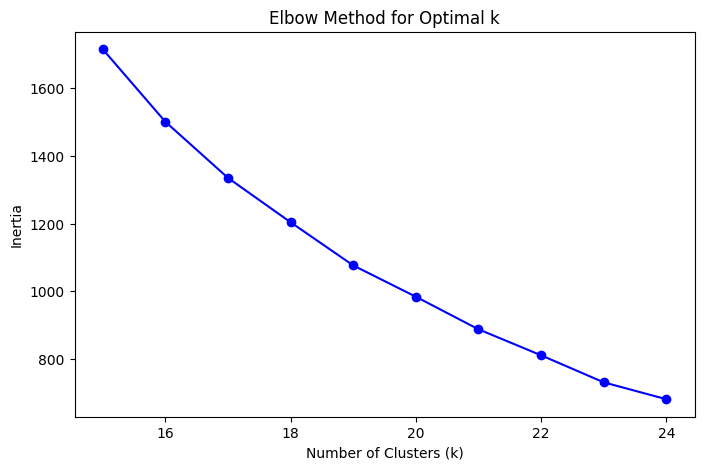

Cluster Centers:
[[ 0.24881786 -0.06583533]
 [-4.1109972  -2.96431078]
 [ 0.24881786  1.01305821]
 [ 0.24881786  1.98408634]
 [-1.20445383 -1.21443131]
 [ 0.24881786 -0.78607497]
 [ 0.24881786  0.66567521]
 [-1.20445383  0.29809654]
 [ 1.7262958  -0.62858373]
 [ 0.24881786  0.16581923]
 [-1.20445383  1.39892234]
 [ 0.24881786 -0.50021934]
 [ 0.24881786  1.44924609]
 [ 0.24881786 -1.20893075]
 [ 0.24881786  2.59476644]
 [-1.20445383 -0.3968808 ]
 [ 0.24881786  0.40784968]
 [ 0.24881786 -0.28050191]]


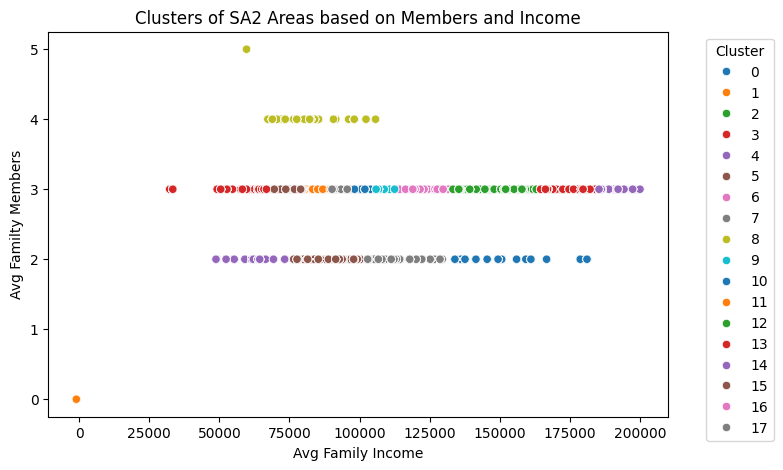

Inertia: [1715.8184892399472, 1501.2323077531585, 1335.0303898218306, 1203.7092511954124, 1075.9585655116418, 983.3389238616169, 886.9717826540794, 809.9947792778801, 729.974655503378, 680.0001790061506]
Silhouette Score: 0.5588049089367839
         Avg_Family_Members_Meam  Avg_Family_Income_Mean  \
Cluster                                                    
0                       3.000000           101128.616407   
1                       0.000000             -999.000000   
2                       3.000000           139186.535948   
3                       3.000000           173234.323859   
4                       2.000000            60614.348463   
5                       3.000000            75696.797876   
6                       3.000000           126994.773559   
7                       2.000000           113870.533881   
8                       4.016656            81242.072795   
9                       3.000000           109312.529953   
10                      2.000000       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Load dataset
df = pd.read_csv('/content/final_dataset.csv')

# Check for null values
print(df.isnull().sum())

features = df[['Avg_Family_Members', 'Avg_Family_Income']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(15, 25)  # Test clusters from 15 to 25
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()




optimal_k = 18

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize clusters using scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Avg_Family_Members'], hue=df['Cluster'], palette="tab10", marker='o')
plt.title('Clusters of SA2 Areas based on Members and Income')
plt.xlabel('Avg Family Income')
plt.ylabel('Avg Familty Members')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

# Compute cluster summary statistics
cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': 'mean',
    'Avg_Family_Income': ['mean', 'min', 'max'],
})

# Rename columns for clarity
cluster_summary.columns = ['Avg_Family_Members_Meam', 'Avg_Family_Income_Mean', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max']

# Display the summary
print(cluster_summary)



In [ ]:
import pandas as pd

df_sa2_csv1 = pd.read_csv('/content/semifinal_dataset.csv')

df_sa2_csv2 = pd.read_csv('/content/SA2_RU_Areas.csv')

df_sa2_csv2.rename(columns={'SA22018_code': 'SA2_ID'}, inplace=True)

merged_sa2_df = pd.merge(df_sa2_csv1, df_sa2_csv2, on='SA2_ID', how='inner')

merged_sa2_df.to_csv('/content/final_dataset.csv', index=False)

print(merged_sa2_df.head())


   Primary_Account_Number  Transaction_Amount Transaction_Date_Time  \
0            5.900000e+11              570.93               43:47.0   
1            5.900000e+11              570.93               43:47.0   
2            5.900000e+11              570.93               43:47.0   
3            5.900000e+11              570.93               43:47.0   
4            5.900000e+11              570.93               43:47.0   

   Point_of_Service_Code  Card_Sequence_Number  Merchant_Type_Code  \
0                      5                     9                5814   
1                      5                     9                5814   
2                      5                     9                5814   
3                      5                     9                5814   
4                      5                     9                5814   

   Acquiring_Institution_ID  Approval_Code  \
0                    224536         482143   
1                    224536         482143   
2             

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/final_dataset.csv')

# Function to categorize time into different periods (without changing 'Transaction_Time')
def categorize_time(transaction_time):
    # Extract hour from 'HH:MM:SS' format string
    hour = int(transaction_time.split(':')[0])

    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply categorization based on extracted hour from the 'Transaction_Time' column
df['Time_of_Day'] = df['Transaction_Time'].apply(categorize_time)

# Display the updated dataset with the new 'Time_of_Day' column
print(df[['Transaction_Time', 'Time_of_Day']].head())

# Save the updated dataset
df.to_csv('/content/final_dataset.csv', index=False)


  Transaction_Time Time_of_Day
0         00:01:53       Night
1         16:34:30   Afternoon
2         23:37:21       Night
3         23:58:57       Night
4         14:15:30   Afternoon


In [ ]:
print(df.isnull().sum())


Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

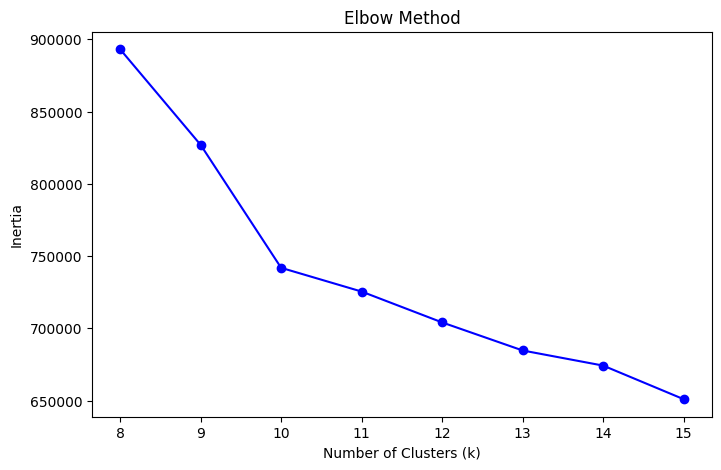

Cluster Centers:
[[-1.45935021e-02  3.07101798e-01 -8.86569398e-02  2.32732070e-01
   1.98366246e-02 -1.31079918e-03 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01  1.14122441e+00 -4.87583204e-01  1.94643961e+00
  -4.46858917e-01 -6.41699879e-01 -7.06658883e-01]
 [ 1.35606268e-03  3.10131909e-01 -1.06502819e-01  2.08306588e-01
   1.07374735e-02 -1.59003138e-02 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01  1.14122441e+00 -4.87583204e-01 -5.13758553e-01
  -4.46858917e-01  1.55836090e+00 -7.06658883e-01]
 [ 6.81568027e-02 -2.55653060e-01  5.01956456e-02  1.37226533e-01
   5.81055733e-02 -5.98896128e-03 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01 -8.76251849e-01  2.05093201e+00 -5.13758553e-01
   2.23784278e+00 -6.41699879e-01 -7.06658883e-01]
 [-5.20976082e-03  3.11483558e-01 -9.70757424e-02  2.13252306e-01
   1.87491009e-02  1.01083718e-02 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01  1.14122441e+00 -4.87583204e-01 -5.13758553e-01
  -4.46858917e-01 -6.41699879e-01  1.4

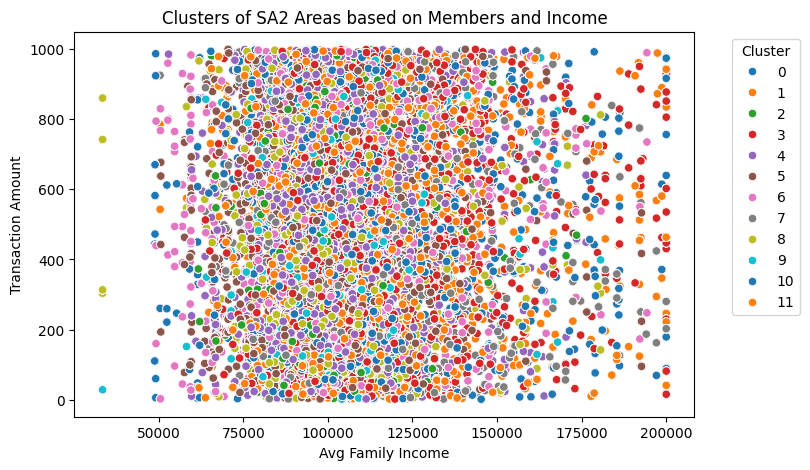

Inertia: [893105.1086819438, 826957.2628989206, 741876.0509456648, 725442.5435431047, 704093.7789260728, 684684.016380895, 674223.9894824869, 650969.1794996047]
Silhouette Score: 0.2571071998017658
         Avg_Family_Members_Mean  Avg_Family_Members_Std  \
Cluster                                                    
0                       3.027074                0.162308   
1                       3.021593                0.145356   
2                       3.005643                0.074917   
3                       3.022703                0.148959   
4                       3.005781                0.075816   
5                       3.001649                0.123157   
6                       3.004018                0.063264   
7                       3.026523                0.160697   
8                       3.003200                0.056483   
9                       3.005357                0.073007   
10                      2.000000                0.000000   
11                    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

df = pd.get_dummies(df, columns=['Geo_Type', 'Time_of_Day'])

features = df[['Transaction_Amount', 'Avg_Family_Income', 'Dep_Score',
               'Avg_Family_Members', 'Avg_Vehicles', 'Merchant_Type_Code']]

# Add one-hot encoded categorical columns
features = features.join(df.filter(like='Geo_Type_'))
features = features.join(df.filter(like='Time_of_Day_'))

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(8,16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

#  Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()




optimal_k = 12
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Transaction_Amount'], hue=df['Cluster'], palette="tab10", marker='o')
plt.title('Clusters of SA2 Areas based on Members and Income')
plt.xlabel('Avg Family Income')
plt.ylabel('Transaction Amount')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': ['mean', 'std'],
    'Avg_Family_Income': ['mean', 'std', 'min', 'max'],
    'Transaction_Amount': ['mean', 'std'],
    'Dep_Score': ['mean', 'std'],
    'Avg_Vehicles': ['mean', 'std'],
    'Merchant_Type_Code': ['mean', 'std']
})

cluster_summary.columns = ['Avg_Family_Members_Mean', 'Avg_Family_Members_Std',
                           'Avg_Family_Income_Mean', 'Avg_Family_Income_Std', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max',
                           'Transaction_Amount_Mean', 'Transaction_Amount_Std',
                           'Dep_Score_Mean', 'Dep_Score_Std',
                           'Avg_Vehicles_Mean', 'Avg_Vehicles_Std',
                           'Merchant_Type_Code_Mean', 'Merchant_Type_Code_Std']

print(cluster_summary)


df.to_csv('/content/cluster_summary.csv', index=False)


Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

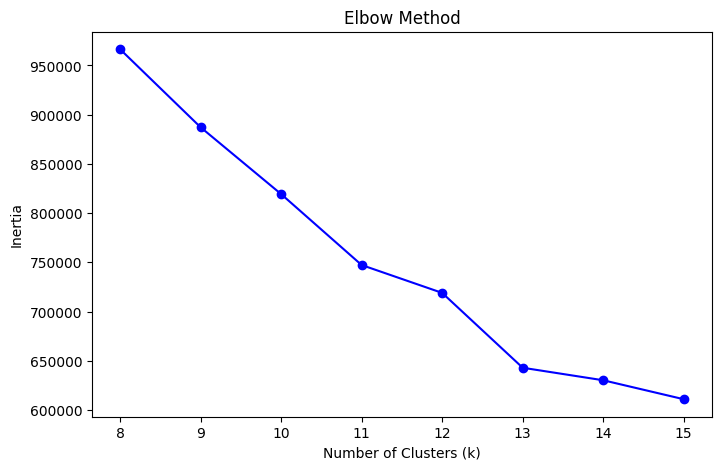

Cluster Centers:
[[-4.25594697e-02  1.39413669e+00 -1.13219745e+00  1.47558434e-01
  -1.11756606e-01  3.43077381e-02 -3.43887691e-01 -3.16813573e-01
  -1.86413939e-01  8.60612321e-01 -4.57569600e-01  1.24914384e-02
   2.46438569e-03  1.56696672e-02 -2.78403110e-02 -1.49034029e-01
  -3.73011585e-02 -1.18188898e-01 -3.22571064e-01 -6.75787573e-01
  -6.50488413e-01 -4.13783602e-01  3.89232002e+00 -1.66926015e-01
  -1.52773977e-01]
 [-2.45258275e-02 -4.79711818e-01  7.02062971e-01  1.59195049e-01
  -1.84926340e-01 -1.53660625e-02  1.31289131e-01 -3.16813573e-01
  -2.94781998e-03 -2.33481381e-01  4.04835471e-01  1.77335186e-03
  -3.65892601e-03  6.43884259e-05  1.33235017e-03 -1.49034029e-01
   7.66797883e-02 -1.18188898e-01 -3.22571064e-01  1.47060312e+00
  -6.50488413e-01 -4.13783602e-01 -2.56916182e-01 -1.66926015e-01
  -1.52773977e-01]
 [ 2.21826025e-03  1.33367228e-01 -1.63164195e-01  1.16357431e-01
  -1.29329170e-01  3.54591412e-02  1.61221245e-01 -3.16813573e-01
  -1.25638542e-01  4.

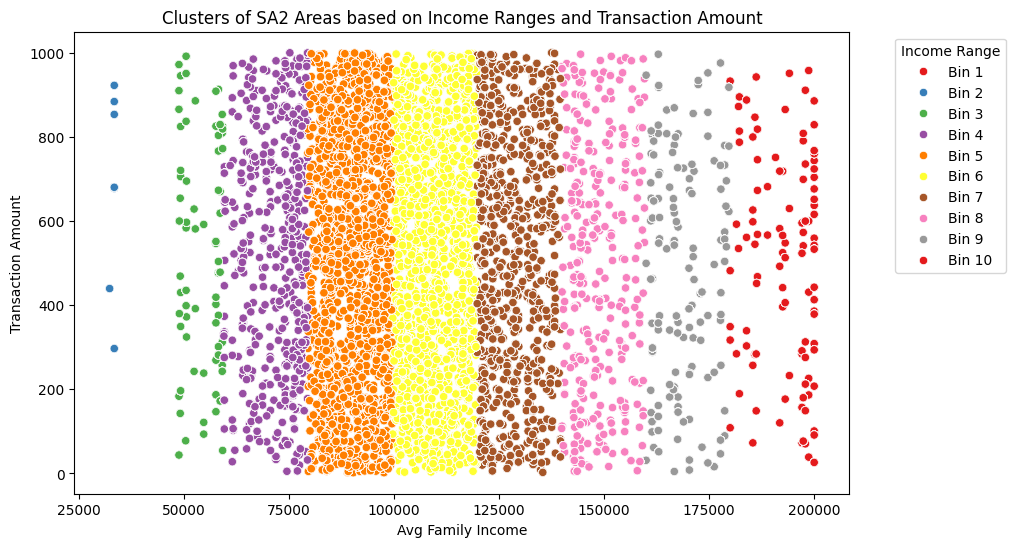

Silhouette Score: 0.2552829487626185
         Avg_Family_Members_Mean  Avg_Family_Members_Std  \
Cluster                                                    
0                       2.984244                0.124543   
1                       2.990165                0.297721   
2                       2.968370                0.187846   
3                       0.000000                0.000000   
4                       2.971364                0.166790   
5                       3.015056                0.398931   
6                       3.000000                0.000000   
7                       2.970886                0.168147   
8                       2.939477                0.238519   
9                       2.724249                0.447132   

         Avg_Family_Income_Mean  Avg_Family_Income_Std  Avg_Family_Income_Min  \
Cluster                                                                         
0                 148631.558845            5782.534053                 139800   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

df = pd.get_dummies(df, columns=['Geo_Type', 'Time_of_Day'])

features = df[['Transaction_Amount', 'Avg_Family_Income', 'Dep_Score',
               'Avg_Family_Members', 'Avg_Vehicles', 'Merchant_Type_Code']]

features = features.join(df.filter(like='Geo_Type_'))
features = features.join(df.filter(like='Time_of_Day_'))

income_bins = np.linspace(df['Avg_Family_Income'].min(), df['Avg_Family_Income'].max(), 11)  # Create 10 bins
income_labels = [f'Bin {i+1}' for i in range(10)]

df['Income_Range'] = pd.cut(df['Avg_Family_Income'], bins=income_bins, labels=income_labels)

features['Income_Range'] = df['Income_Range'].astype(str)

features = pd.get_dummies(features, columns=['Income_Range'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(8, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Transaction_Amount'], hue=df['Income_Range'], palette="Set1", marker='o')
plt.title('Clusters of SA2 Areas based on Income Ranges and Transaction Amount')
plt.xlabel('Avg Family Income')
plt.ylabel('Transaction Amount')
plt.legend(title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sil_score = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': ['mean', 'std'],
    'Avg_Family_Income': ['mean', 'std', 'min', 'max'],
    'Transaction_Amount': ['mean', 'std'],
    'Dep_Score': ['mean', 'std'],
    'Avg_Vehicles': ['mean', 'std'],
    'Merchant_Type_Code': ['mean', 'std']
})

cluster_summary.columns = ['Avg_Family_Members_Mean', 'Avg_Family_Members_Std',
                           'Avg_Family_Income_Mean', 'Avg_Family_Income_Std', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max',
                           'Transaction_Amount_Mean', 'Transaction_Amount_Std',
                           'Dep_Score_Mean', 'Dep_Score_Std',
                           'Avg_Vehicles_Mean', 'Avg_Vehicles_Std',
                           'Merchant_Type_Code_Mean', 'Merchant_Type_Code_Std']

print(cluster_summary)

df.to_csv('/content/cluster_summary.csv', index=False)


Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

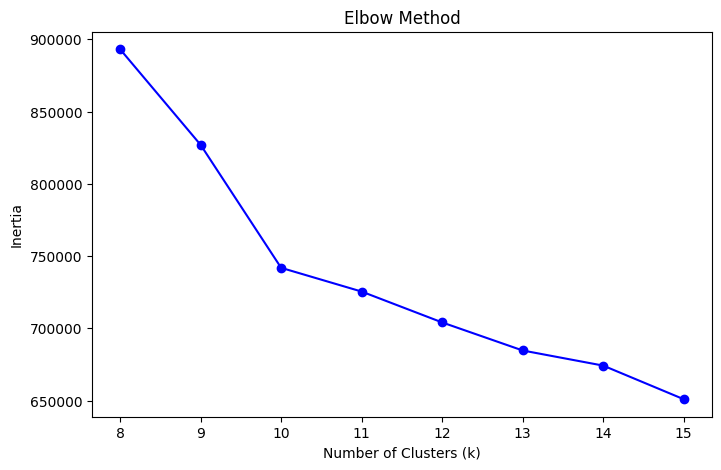

Cluster Centers:
[[-1.95585668e-01 -1.02257442e+00  1.53291185e+00  4.56843865e+00
   1.03473382e-01  6.41800835e-02 -3.17740617e-01 -1.38868638e-01
  -2.12577987e-01  6.66341537e-01 -2.72785763e-01  3.88398044e-02
   3.01919227e-02 -4.42987604e-02 -1.46358256e-02]
 [-3.48881460e-02 -1.61247057e-01 -1.48115508e-02  1.12080941e-01
   1.04389027e-01 -3.72189509e-02  2.25115788e+00 -3.76707892e-01
  -3.03837474e-01 -8.76251849e-01 -4.87583204e-01  4.49228361e-01
  -4.46858917e-01 -6.41699879e-01  5.84593252e-01]
 [ 1.07193546e-02  3.38736023e-01 -1.30102523e-01  1.12080941e-01
   2.15349296e-02 -3.95555356e-03 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01  1.14122441e+00 -4.87583204e-01 -5.13758553e-01
   2.23784278e+00 -6.41699879e-01 -7.06658883e-01]
 [ 1.69307343e-02 -4.14071725e-01  6.91723155e-01  1.12080941e-01
  -2.45415032e-01 -3.50841369e-02 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01  1.14122441e+00 -4.87583204e-01 -5.13758553e-01
  -4.46858917e-01  1.55836090e+00 -7.0

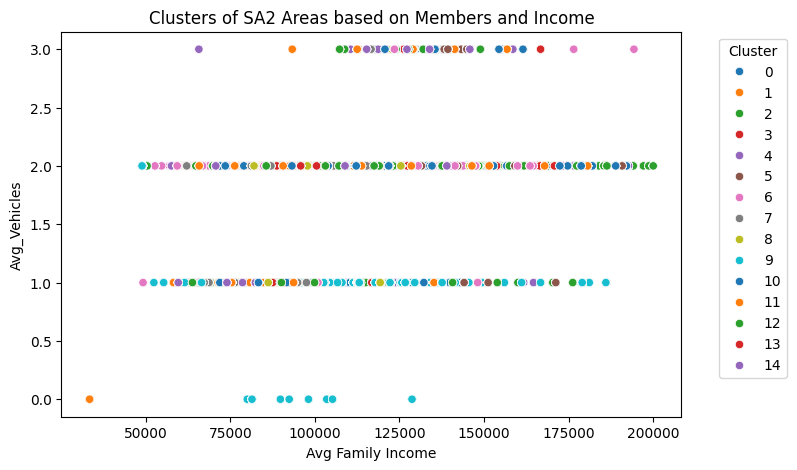

Inertia: [893105.1086819438, 826957.2628989206, 741876.0509456648, 725442.5435431047, 704093.7789260728, 684684.016380895, 674223.9894824869, 650969.1794996047]
Silhouette Score: 0.2444664453444076
         Avg_Family_Members_Mean  Avg_Family_Members_Std  \
Cluster                                                    
0                       4.000000                0.000000   
1                       3.000000                0.000000   
2                       3.000000                0.000000   
3                       3.000000                0.000000   
4                       2.990821                0.095377   
5                       3.000000                0.000000   
6                       3.000000                0.000000   
7                       3.000000                0.000000   
8                       3.000000                0.000000   
9                       2.000000                0.000000   
10                      3.000000                0.000000   
11                    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

df = pd.get_dummies(df, columns=['Geo_Type', 'Time_of_Day'])

features = df[['Transaction_Amount', 'Avg_Family_Income', 'Dep_Score',
               'Avg_Family_Members', 'Avg_Vehicles', 'Merchant_Type_Code']]

# Add one-hot encoded categorical columns
features = features.join(df.filter(like='Geo_Type_'))
features = features.join(df.filter(like='Time_of_Day_'))

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(8,16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

#  Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Avg_Vehicles'], hue=df['Cluster'], palette="tab10", marker='o')
plt.title('Clusters of SA2 Areas based on Members and Income')
plt.xlabel('Avg Family Income')
plt.ylabel('Avg_Vehicles')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': ['mean', 'std'],
    'Avg_Family_Income': ['mean', 'std', 'min', 'max'],
    'Transaction_Amount': ['mean', 'std'],
    'Dep_Score': ['mean', 'std'],
    'Avg_Vehicles': ['mean', 'std'],
    'Merchant_Type_Code': ['mean', 'std']
})

cluster_summary.columns = ['Avg_Family_Members_Mean', 'Avg_Family_Members_Std',
                           'Avg_Family_Income_Mean', 'Avg_Family_Income_Std', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max',
                           'Transaction_Amount_Mean', 'Transaction_Amount_Std',
                           'Dep_Score_Mean', 'Dep_Score_Std',
                           'Avg_Vehicles_Mean', 'Avg_Vehicles_Std',
                           'Merchant_Type_Code_Mean', 'Merchant_Type_Code_Std']

print(cluster_summary)


df.to_csv('/content/cluster_summary.csv', index=False)



In [ ]:
import pandas as pd

# Load the dataset
df_sa2_excel = pd.read_excel('/content/NZDep2023.xlsx')

# Remove rows where 'Dep_Score' or 'Avg_Dep_Score' are null
df_sa2_excel_cleaned = df_sa2_excel.dropna(subset=['Dep_Score', 'Avg_Dep_Score'])

# Display the first few rows of the cleaned dataset
print(df_sa2_excel_cleaned.head())

df_sa2_excel_cleaned.to_csv('/content/NZDep2023.csv', index=False)






   SA2_ID  Dep_Score  Avg_Dep_Score
0  100100       10.0         1127.0
1  100200        9.0         1110.0
2  100301       10.0         1128.0
3  100400        9.0         1072.0
4  100500        9.0         1109.0


In [ ]:
import pandas as pd

# Load the dataset
df_family_csv = pd.read_csv('/content/2023-census-family.csv')

# Remove rows where 'Avg_Family_Members' is -999
df_family_csv_cleaned = df_family_csv[df_family_csv["Avg_Family_Members"] != -999]

# Display the first few rows of the cleaned dataset
print(df_family_csv_cleaned.head())

df_family_csv_cleaned.to_csv('/content/2023-census-family.csv', index=False)


   SA2_ID  Avg_Family_Members  Avg_Family_Income
1  220800                   3             101600
2  339002                   3             105300
3  310901                   3              88200
4  191700                   3             119600
5  191801                   3             111800


In [ ]:
import pandas as pd

# Load the dataset
df_household_csv = pd.read_csv('/content/2023-census-household.csv')

# Remove rows where 'Avg_Family_Members' is -999
df_household_csv_cleaned = df_household_csv[df_household_csv["Total_People_Stated"] != -999]

# Display the first few rows of the cleaned dataset
print(df_household_csv_cleaned.head())

df_household_csv_cleaned.to_csv('/content/2023-census-household.csv', index=False)


   SA2_ID             SA2_NAME  Avg_Vehicles  Total_Vehicles  \
0  187600                Tiroa             3              30   
1  223400             Mowhanau             2            1041   
2  101801            Whakarara             2             726   
3  174701               Okauia             2             750   
4  256600  Homebush-Te Ore Ore             2            1011   

   Total_People_Stated  
0                   12  
1                  465  
2                  390  
3                  342  
4                  411  


In [ ]:
import pandas as pd

df_csv1 = pd.read_csv('/content/final_merged_SA2_dataset.csv')

df_csv2 = pd.read_csv('/content/SA2_RU_Areas.csv')

final_merged_SA2_dataset = pd.merge(df_csv1, df_csv2, on='SA2_ID', how='outer')

final_merged_SA2_dataset.to_csv('/content/final_merged_SA2_dataset.csv', index=False)

print(final_merged_SA2_dataset.head())


   SA2_ID                   SA2_NAME  Avg_Vehicles  Total_Vehicles  \
0  100100                 North Cape           2.0          1125.0   
1  100200           Rangaunu Harbour           2.0          1347.0   
2  100301  Inlets Far North District           1.0            27.0   
3  100400         Karikari Peninsula           2.0          1032.0   
4  100500                   Tangonge           2.0           651.0   

   Total_People_Stated  Avg_Family_Members  Avg_Family_Income  Dep_Score  \
0                558.0                 3.0            65900.0       10.0   
1                660.0                 3.0            76700.0        9.0   
2                 27.0                 2.0            63800.0       10.0   
3                516.0                 3.0            66400.0        9.0   
4                309.0                 3.0            75800.0        9.0   

   Avg_Dep_Score GCH2018  
0         1127.0      R3  
1         1110.0      R2  
2         1128.0     NaN  
3         1072

In [ ]:
import pandas as pd

# Load the dataset
df_finalSA2_csv = pd.read_csv('/content/final_merged_SA2_dataset.csv')

# Drop rows where 'Avg_Vehicles' is null
df_finalSA2_csv_cleaned = df_finalSA2_csv.dropna(subset=['Avg_Vehicles'])

# Display the first few rows of the cleaned dataset
print(df_finalSA2_csv_cleaned.head())

# Save the cleaned dataset
df_finalSA2_csv_cleaned.to_csv('/content/final_merged_SA2_dataset.csv', index=False)


   SA2_ID                   SA2_NAME  Avg_Vehicles  Total_Vehicles  \
0  100100                 North Cape           2.0          1125.0   
1  100200           Rangaunu Harbour           2.0          1347.0   
2  100301  Inlets Far North District           1.0            27.0   
3  100400         Karikari Peninsula           2.0          1032.0   
4  100500                   Tangonge           2.0           651.0   

   Total_People_Stated  Avg_Family_Members  Avg_Family_Income  Dep_Score  \
0                558.0                 3.0            65900.0       10.0   
1                660.0                 3.0            76700.0        9.0   
2                 27.0                 2.0            63800.0       10.0   
3                516.0                 3.0            66400.0        9.0   
4                309.0                 3.0            75800.0        9.0   

   Avg_Dep_Score GCH2018  
0         1127.0      R3  
1         1110.0      R2  
2         1128.0     NaN  
3         1072

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/final_merged_SA2_dataset.csv')

# Define the possible values for Geo_Type
geo_types = ['R1', 'R2', 'R3', 'U1', 'U2']

# Identify null values in Geo_Type
null_mask = df['Geo_Type'].isnull()

# Assign random values only to null entries
df.loc[null_mask, 'Geo_Type'] = np.random.choice(geo_types, size=null_mask.sum(), replace=True)

# Display the first few rows of the updated dataset
print(df.head())

# Save the updated dataset
df.to_csv('/content/final_merged_SA2_dataset_Geo.csv', index=False)


   SA2_ID                   SA2_NAME  Avg_Vehicles  Total_Vehicles  \
0  100100                 North Cape             2            1125   
1  100200           Rangaunu Harbour             2            1347   
2  100301  Inlets Far North District             1              27   
3  100400         Karikari Peninsula             2            1032   
4  100500                   Tangonge             2             651   

   Total_People_Stated  Avg_Family_Members  Avg_Family_Income  Dep_Score  \
0                  558                   3              65900         10   
1                  660                   3              76700          9   
2                   27                   2              63800         10   
3                  516                   3              66400          9   
4                  309                   3              75800          9   

   Avg_Dep_Score Geo_Type  
0           1127       R3  
1           1110       R2  
2           1128       R1  
3         

Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

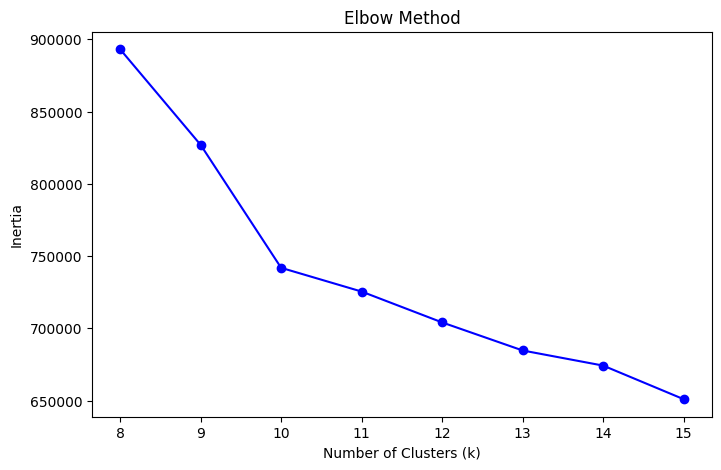

Cluster Centers:
[[-2.55302090e-02 -3.67913532e-01  1.96823934e-01  1.19428605e-01
   1.71664232e-01 -8.80784340e-03 -4.44215846e-01  2.65457672e+00
  -3.03837474e-01 -8.76251849e-01 -4.87583204e-01 -3.66800163e-03
  -5.08937177e-03 -7.43668553e-03  1.43576897e-02]
 [-5.20976082e-03  3.11483558e-01 -9.70757424e-02  2.13252306e-01
   1.87491009e-02  1.01083718e-02 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01  1.14122441e+00 -4.87583204e-01 -5.13758553e-01
  -4.46858917e-01 -6.41699879e-01  1.41510993e+00]
 [ 1.35606268e-03  3.10131909e-01 -1.06502819e-01  2.08306588e-01
   1.07374735e-02 -1.59003138e-02 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01  1.14122441e+00 -4.87583204e-01 -5.13758553e-01
  -4.46858917e-01  1.55836090e+00 -7.06658883e-01]
 [ 4.13172681e-02 -2.38650519e-01  5.25023343e-02  1.30963813e-01
   6.13773518e-02  8.71899099e-03 -4.44215846e-01 -3.76707892e-01
  -3.03837474e-01 -8.76251849e-01  2.05093201e+00  1.94643961e+00
  -4.46858917e-01 -6.41699879e-01 -7.0

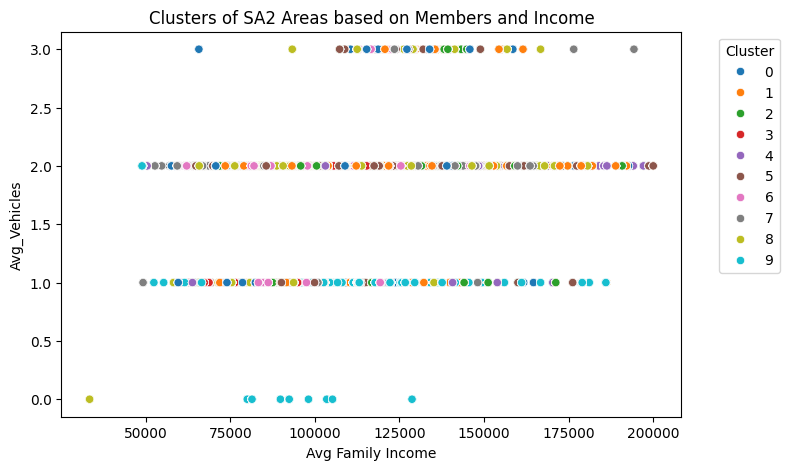

Inertia: [893105.1086819438, 826957.2628989206, 741876.0509456648, 725442.5435431047, 704093.7789260728, 684684.016380895, 674223.9894824869, 650969.1794996047]
Silhouette Score: 0.234737759196262
         Avg_Family_Members_Mean  Avg_Family_Members_Std  \
Cluster                                                    
0                       3.001649                0.123157   
1                       3.022703                0.148959   
2                       3.021593                0.145356   
3                       3.004237                0.064964   
4                       3.026523                0.160697   
5                       3.027074                0.162308   
6                       3.006162                0.078260   
7                       3.004018                0.063264   
8                       3.003836                0.061817   
9                       2.000000                0.000000   

         Avg_Family_Income_Mean  Avg_Family_Income_Std  Avg_Family_Income_Min  \
C

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

df = pd.get_dummies(df, columns=['Geo_Type', 'Time_of_Day'])

features = df[['Transaction_Amount', 'Avg_Family_Income', 'Dep_Score',
               'Avg_Family_Members', 'Avg_Vehicles', 'Merchant_Type_Code']]

# Add one-hot encoded categorical columns
features = features.join(df.filter(like='Geo_Type_'))
features = features.join(df.filter(like='Time_of_Day_'))

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K = range(8,16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

#  Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()







optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Avg_Vehicles'], hue=df['Cluster'], palette="tab10", marker='o')
plt.title('Clusters of SA2 Areas based on Members and Income')
plt.xlabel('Avg Family Income')
plt.ylabel('Avg_Vehicles')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sil_score = silhouette_score(scaled_features, df['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {sil_score}")

cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': ['mean', 'std'],
    'Avg_Family_Income': ['mean', 'std', 'min', 'max'],
    'Transaction_Amount': ['mean', 'std'],
    'Dep_Score': ['mean', 'std'],
    'Avg_Vehicles': ['mean', 'std'],
    'Merchant_Type_Code': ['mean', 'std']
})

cluster_summary.columns = ['Avg_Family_Members_Mean', 'Avg_Family_Members_Std',
                           'Avg_Family_Income_Mean', 'Avg_Family_Income_Std', 'Avg_Family_Income_Min', 'Avg_Family_Income_Max',
                           'Transaction_Amount_Mean', 'Transaction_Amount_Std',
                           'Dep_Score_Mean', 'Dep_Score_Std',
                           'Avg_Vehicles_Mean', 'Avg_Vehicles_Std',
                           'Merchant_Type_Code_Mean', 'Merchant_Type_Code_Std']

print(cluster_summary)


best_k = None
best_score = -1

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f'k={k}, Silhouette Score={score}')

    if score > best_score:
        best_score = score
        best_k = k

print(f'Optimal k: {best_k}, Best Silhouette Score: {best_score}')




In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/final_dataset.csv')

# Drop rows where 'Avg_Vehicles' is negative
df_cleaned = df[df['Avg_Vehicles'] >= 0]

# Display the cleaned dataset (optional)
print(df_cleaned.head())

# Save the cleaned dataset
df_cleaned.to_csv('/content/final_dataset.csv', index=False)


   Primary_Account_Number  Transaction_Amount Transaction_Date_Time  \
0            3.010190e+13              775.87               15:40.5   
1            3.010190e+13              775.87               15:40.5   
2            3.010190e+13              775.87               15:40.5   
3            3.010190e+13              775.87               15:40.5   
4            3.010190e+13              775.87               15:40.5   

   Point_of_Service_Code  Card_Sequence_Number  Merchant_Type_Code  \
0                      5                     8                5814   
1                      5                     8                5814   
2                      5                     8                5814   
3                      5                     8                5814   
4                      5                     8                5814   

   Acquiring_Institution_ID  Approval_Code  \
0                    519919         697862   
1                    519919         697862   
2             

In [ ]:
best_k = None
best_score = -1

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f'k={k}, Silhouette Score={score}')

    if score > best_score:
        best_score = score
        best_k = k

print(f'Optimal k: {best_k}, Best Silhouette Score: {best_score}')


Primary_Account_Number                    0
Transaction_Amount                        0
Transaction_Date_Time                     0
Point_of_Service_Code                     0
Card_Sequence_Number                      0
Merchant_Type_Code                        0
Acquiring_Institution_ID                  0
Approval_Code                             0
Card_Acceptor_Terminal_ID                 0
Card_Acceptor_ID_Code                     0
Card_Acceptor_Name_Location               0
Transaction_Currency_Code                 0
Transaction_Life_Cycle_ID                 0
Transaction_Destination_Institution_ID    0
Transaction_Originator_Institution_ID     0
Purchase_Time                             0
Customer_Reference                        0
Banking_Products                          0
Street_Address                            0
City                                      0
State                                     0
ZIP_Code                                  0
SA2_ID                          

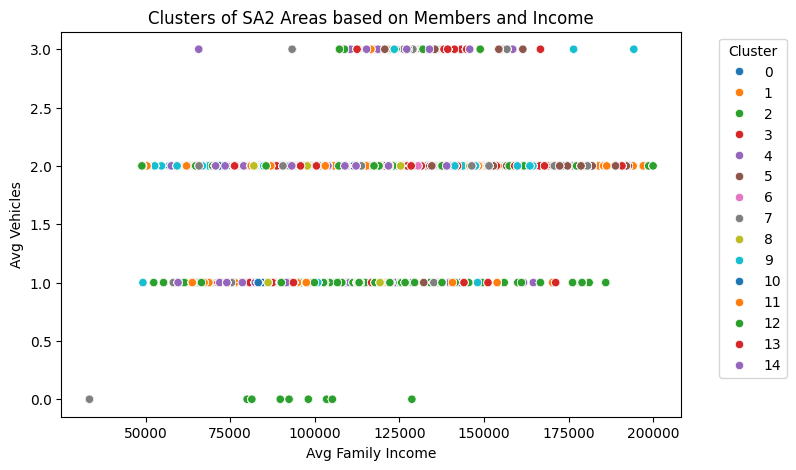

         Avg_Family_Members_Mean  Avg_Family_Income_Mean  \
Cluster                                                    
0                       4.000000            81977.769231   
1                       3.000000           112876.269825   
2                       3.000000           117994.482103   
3                       3.000000           117861.514303   
4                       2.993169            99241.344552   
5                       3.000000           139353.580943   
6                       2.979137           105429.136691   
7                       3.000000           104637.588288   
8                       3.000000           102691.307117   
9                       2.975536           106113.805436   
10                      3.000000           102144.067797   
11                      3.000000           102703.904881   
12                      2.000000           107955.903071   
13                      3.000000           104950.341403   
14                      3.000000        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/final_dataset.csv')

print(df.isnull().sum())

# One-hot encoding categorical columns
df = pd.get_dummies(df, columns=['Geo_Type', 'Time_of_Day'])

# features for clustering
features = df[['Transaction_Amount', 'Avg_Family_Income', 'Dep_Score',
               'Avg_Family_Members', 'Avg_Vehicles']]

# Add one-hot encoded categorical columns
features = features.join(df.filter(like='Geo_Type_'))
features = features.join(df.filter(like='Time_of_Day_'))

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg_Family_Income'], y=df['Avg_Vehicles'], hue=df['Cluster'], palette="tab10", marker='o')
plt.title('Clusters of SA2 Areas based on Members and Income')
plt.xlabel('Avg Family Income')
plt.ylabel('Avg Vehicles')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


geo_type_columns = df.filter(like='Geo_Type_').columns
time_of_day_columns = df.filter(like='Time_of_Day_').columns

cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': ['mean'],
    'Avg_Family_Income': ['mean'],
    'Transaction_Amount': ['mean'],
    'Dep_Score': ['mean'],
    'Avg_Vehicles': ['mean'],
    **{col: 'mean' for col in geo_type_columns},
    **{col: 'mean' for col in time_of_day_columns}
})


cluster_summary.columns = ['Avg_Family_Members_Mean',
                           'Avg_Family_Income_Mean',
                           'Transaction_Amount_Mean',
                           'Dep_Score_Mean',
                           'Avg_Vehicles_Mean'] + \
                          list(geo_type_columns) + list(time_of_day_columns)


print(cluster_summary)

# Save to CSV
cluster_summary.to_csv('/content/cluster_summary.csv')
df.to_csv('/content/clustered_data.csv', index=False)


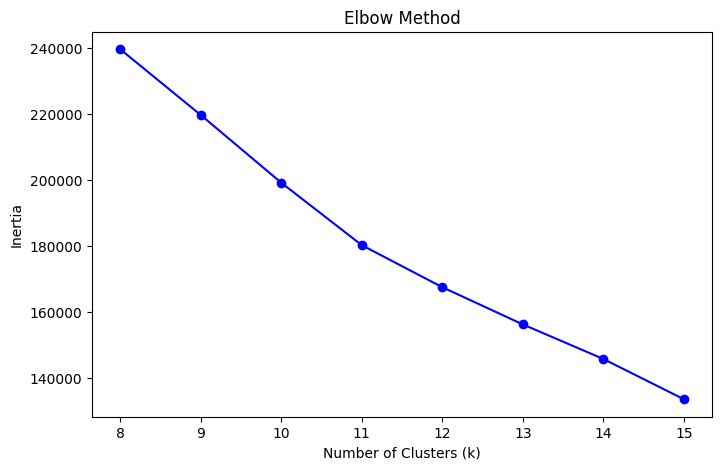

Silhouette Score: 0.45860738544458923
        Avg_Family_Members           Avg_Family_Income                        \
                      mean       std              mean           std     min   
Cluster                                                                        
0                 3.000000  0.000000     117810.188468  19216.211718   85600   
1                 3.000000  0.000000     116755.361050  17686.596574   88100   
2                 3.000000  0.000000     105912.546223  30726.490682   33400   
3                 3.000000  0.000000     139493.531420  22377.875661  100000   
4                 2.000000  0.000000     107955.903071  32519.332767   48800   
5                 3.000000  0.000000     123613.580065  17332.482866   80600   
6                 4.000000  0.000000      81977.769231  10341.164464   67300   
7                 2.976134  0.152642     106000.238663  28601.515736   49200   
8                 3.000000  0.000000      89202.983560  11533.301600   52900   
9 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/final_dataset.csv')

# One-hot encoding categorical columns
df = pd.get_dummies(df, columns=['Geo_Type', 'Time_of_Day'])

# Features for clustering (ONLY StatsNZ data)
features = df[['Avg_Family_Income', 'Dep_Score', 'Avg_Family_Members', 'Avg_Vehicles']]
features = features.join(df.filter(like='Geo_Type_'))  # Add one-hot encoded geo type columns

# Standardize features for K-Means
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to find optimal k
inertia = []
K = range(8, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose optimal K
optimal_k = 12
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Silhouette Score
sil_score = silhouette_score(scaled_features, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Aggregations
geo_type_columns = df.filter(like='Geo_Type_').columns
time_of_day_columns = df.filter(like='Time_of_Day_').columns

# Grouped Summary (ensuring no transaction features are used in clustering)
cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': ['mean', 'std'],
    'Avg_Family_Income': ['mean', 'std', 'min', 'max'],
    'Dep_Score': ['mean', 'std'],
    'Avg_Vehicles': ['mean', 'std'],
    'Transaction_Amount': ['mean', 'std'],  # Aggregation (not used in clustering)

    # Compute proportion of each Geo Type and Time of Day in each cluster
    **{col: 'mean' for col in geo_type_columns},
    **{col: 'mean' for col in time_of_day_columns}
})

# Add proportion of customers in each cluster
total_customers = len(df)
cluster_counts = df['Cluster'].value_counts(normalize=True) * 100  # Percentage of customers per cluster
cluster_summary['Customer_Proportion (%)'] = cluster_counts

# Fix Merchant_Type_Code aggregation (Top 5 most frequent)
top_merchant_types = df.groupby('Cluster')['Merchant_Type_Code'].apply(lambda x: x.value_counts().head(5).index.tolist())
cluster_summary['Top_5_Merchant_Types'] = top_merchant_types

# Fix Time of Day aggregation (Find highest proportion)
most_common_time_of_day = df.groupby('Cluster')[time_of_day_columns].mean().idxmax(axis=1)
cluster_summary['Most_Common_Transaction_Time'] = most_common_time_of_day

# Print final cluster summary
pd.set_option('display.max_columns', None)
print(cluster_summary)


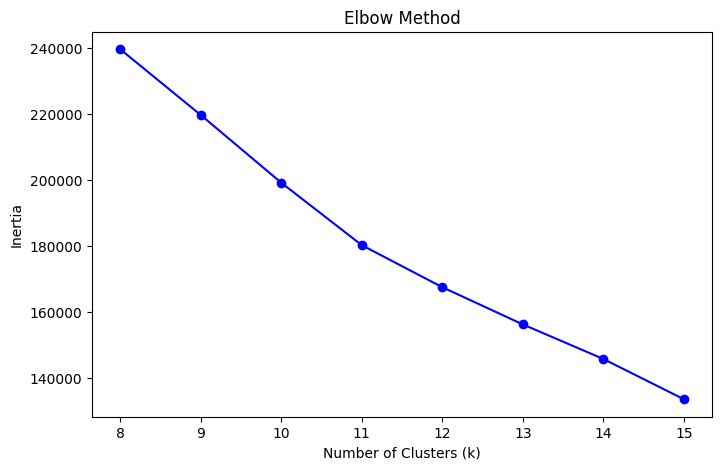

        Avg_Family_Members Avg_Family_Income Dep_Score Avg_Vehicles  \
                      mean              mean      mean         mean   
Cluster                                                               
0                 2.993183      99427.826738  5.965580     1.998088   
1                 3.000000     116755.361050  3.054814     2.053720   
2                 3.000000     105912.546223  7.231115     0.981775   
3                 3.000000     139493.531420  2.347658     2.065189   
4                 2.000000     107955.903071  5.907298     1.190194   
5                 3.000000     123613.580065  2.742406     2.076968   
6                 4.000000      81977.769231  9.836923     1.973077   
7                 2.976134     106000.238663  5.460024     2.003938   
8                 3.000000      89202.983560  7.893749     1.866247   
9                 3.000000      91150.706262  7.352241     1.914915   
10                3.000000      99652.828198  7.168478     2.006754   

     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/final_dataset.csv')

# One-hot encoding categorical columns
df = pd.get_dummies(df, columns=['Geo_Type', 'Time_of_Day'])

# Features for clustering (ONLY StatsNZ data)
features = df[['Avg_Family_Income', 'Dep_Score', 'Avg_Family_Members', 'Avg_Vehicles']]
features = features.join(df.filter(like='Geo_Type_'))  # Add one-hot encoded geo type columns

# Standardize features for K-Means
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method to find optimal k
inertia = []
K = range(8, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose optimal K
optimal_k = 11
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Silhouette Score
#sil_score = silhouette_score(scaled_features, df['Cluster'])
#print(f"Silhouette Score: {sil_score}")

# Aggregations
geo_type_columns = df.filter(like='Geo_Type_').columns
time_of_day_columns = df.filter(like='Time_of_Day_').columns

# Grouped Summary (ensuring no transaction features are used in clustering)
cluster_summary = df.groupby('Cluster').agg({
    'Avg_Family_Members': ['mean'],
    'Avg_Family_Income': ['mean'],
    'Dep_Score': ['mean'],
    'Avg_Vehicles': ['mean'],
    'Transaction_Amount': ['mean'],  # Aggregation (not used in clustering)

    # Compute proportion of each Geo Type and Time of Day in each cluster
    **{col: 'mean' for col in geo_type_columns},
    **{col: 'mean' for col in time_of_day_columns}
})

for col in time_of_day_columns:
    cluster_summary[col] = cluster_summary[col] * 100
    cluster_summary.rename(columns={col: col + "_Proportion"}, inplace=True)

# Add proportion of customers in each cluster
total_customers = len(df)
cluster_counts = df['Cluster'].value_counts(normalize=True) * 100  # Percentage of customers per cluster
cluster_summary['Customer_Proportion (%)'] = cluster_counts

# Fix Merchant_Type_Code aggregation (Top 5 most frequent)
top_merchant_types = df.groupby('Cluster')['Merchant_Type_Code'].apply(lambda x: x.value_counts().head(5).index.tolist())
cluster_summary['Top_5_Merchant_Types'] = top_merchant_types



# Print final cluster summary
pd.set_option('display.max_columns', None)
print(cluster_summary)

cluster_summary.to_csv('/content/cluster_summary.csv')
df.to_csv('/content/clustered_data.csv', index=False)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



df = pd.read_csv('/content/final_dataset.csv')


# Create binary target variable
df['Target'] = (df['Dep_Score'] > 5).astype(int)

# Feature Selection
X = df[['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Transaction_Amount']]  
y = df['Target']  

# Data partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Interpret coefficients
print("Model Coefficients:", model.coef_)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



df = pd.read_csv('/content/clustered_data.csv')


# Create binary target variable
df['Target'] = (df['Dep_Score'] > 5).astype(int)

# Feature Selection
X = df[['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles','Transaction_Amount']]
y = df['Target']  # Target variable

# Data partitioning into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Interpret coefficients
print("Model Coefficients:", model.coef_)

Accuracy: 0.811993839121578
Confusion Matrix:
 [[8224 2037]
 [1747 8119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81     10261
           1       0.80      0.82      0.81      9866

    accuracy                           0.81     20127
   macro avg       0.81      0.81      0.81     20127
weighted avg       0.81      0.81      0.81     20127

Model Coefficients: [[-2.52218205  0.2479609  -0.83897745 -0.01895174]]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/final_dataset.csv')

top_10_merchant_types = df['Merchant_Type_Code'].value_counts().head(10)

unique_merchant_types = df['Merchant_Type_Code'].unique()

print(top_10_merchant_types)

print(unique_merchant_types)



Merchant_Type_Code
5912    20626
5411    20496
5814    20477
5812    19759
5999    19275
Name: count, dtype: int64
[5814 5812 5999 5912 5411]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/clustered_data.csv')

customers = df['Primary_Account_Number'].unique()
print(len(customers))




#customers_df = pd.DataFrame(customers, columns=['Primary_Account_Number'])

#customers_df.to_csv('/content/customers_MerchantType_Cluster.csv', index=False)




6526


In [ ]:
import pandas as pd

df = pd.read_csv('/content/filtered_updated_clustered_data.csv')

customers_df = df[['Primary_Account_Number', 'Cluster']].drop_duplicates(subset=['Primary_Account_Number'])

merchant_types = [5912, 5411, 5814, 5812, 5999, 5541, 7011, 4111, 5311, 7299]

for merchant_type in merchant_types:
    customers_df[f'Merchant_{merchant_type}_Proportion'] = 0.0

for i, row in customers_df.iterrows():
    customer = row['Primary_Account_Number']
    total_transactions = df[df['Primary_Account_Number'] == customer].shape[0]
    customers_df.at[i, 'Total_Transactions'] = total_transactions

    if total_transactions > 0:
        for merchant_type in merchant_types:
            customer_merchant_count = df[
                (df['Primary_Account_Number'] == customer) &
                (df['Merchant_Type_Code'] == merchant_type)
            ].shape[0]

            customers_df.at[i, f'Merchant_{merchant_type}_Proportion'] = customer_merchant_count / total_transactions

customers_df.to_csv('/content/customers_merchant_transactions.csv', index=False)



In [ ]:
import pandas as pd

df = pd.read_csv('/content/filtered_updated_clustered_data.csv')

customers_df = df[['Primary_Account_Number', 'Cluster']].drop_duplicates(subset=['Primary_Account_Number'])

merchant_types = [5912, 5411, 5814, 5812, 5999, 5541, 7011, 4111, 5311, 7299]

for merchant_type in merchant_types:
    customers_df[f'Merchant_{merchant_type}_Transaction_Amount_Proportion'] = 0.0

for i, row in customers_df.iterrows():
    customer = row['Primary_Account_Number']
    total_transactions = df[df['Primary_Account_Number'] == customer].shape[0]
    customers_df.at[i, 'Total_Transactions'] = total_transactions

    total_transaction_amount = df[df['Primary_Account_Number'] == customer]['Transaction_Amount'].sum()
    avg_transaction_amount = df[df['Primary_Account_Number'] == customer]['Transaction_Amount'].mean()

    if total_transaction_amount > 0:
        for merchant_type in merchant_types:
            customer_merchant_transactions = df[
                (df['Primary_Account_Number'] == customer) &
                (df['Merchant_Type_Code'] == merchant_type)
            ]

            merchant_transaction_amount = customer_merchant_transactions['Transaction_Amount'].sum()

            customers_df.at[i, f'Merchant_{merchant_type}_Transaction_Amount_Proportion'] = merchant_transaction_amount / total_transaction_amount

            customers_df.at[i, f'Total_Transaction_Amount'] = total_transaction_amount

            customers_df.at[i, f'Avg_Transaction_Amount'] = avg_transaction_amount

customers_df.to_csv('/content/customers_merchant_transactions_amount.csv', index=False)



In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/clustered_data.csv')

merchant_types = [5912, 5411, 5814, 5812, 5999, 5541, 7011, 4111, 5311, 7299] # Adding Merchant types

customers = df['Primary_Account_Number'].unique()

new_transactions = []

def get_random_merchants():
    num_merchants = np.random.randint(6, 11)
    selected_merchants = np.random.choice(merchant_types, size=num_merchants - 1, replace=False).tolist()
    selected_merchants.append(5411) # supermarket merchant type code
    return list(set(selected_merchants))

for customer in customers:

    num_transactions = np.random.randint(36, 49)

    selected_merchants = get_random_merchants()
    transaction_counts = np.random.multinomial(num_transactions, np.ones(len(selected_merchants)) / len(selected_merchants))

    for merchant, count in zip(selected_merchants, transaction_counts):
        for _ in range(count):
            sample_transaction = df[df['Primary_Account_Number'] == customer].sample(1).iloc[0].copy()
            sample_transaction['Merchant_Type_Code'] = merchant
            new_transactions.append(sample_transaction)

new_df = pd.DataFrame(new_transactions)

new_df.to_csv('/content/updated_clustered_data.csv', index=False)


In [ ]:
df = pd.read_csv('/content/updated_clustered_data.csv')

transaction_amount = df['Transaction_Amount'].unique()

print(len(transaction_amount))


274398


In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/updated_clustered_data.csv')

df['Transaction_Amount'] = np.random.uniform(1, 1000, df.shape[0])


df.to_csv('/content/updated_clustered_data.csv', index=False)



In [ ]:
import pandas as pd

# Load customer transaction proportions
customers_df = pd.read_csv('/content/customers_merchant_transactions (1).csv')

# Identify customers with Merchant_5411_Proportion == 0
customers_to_remove = customers_df[customers_df['Merchant_5411_Proportion'] == 0]['Primary_Account_Number']

# Load transaction dataset
transactions_df = pd.read_csv('/content/updated_clustered_data.csv')

# Remove records of customers in the removal list
filtered_transactions_df = transactions_df[~transactions_df['Primary_Account_Number'].isin(customers_to_remove)]

# Save the updated dataset
filtered_transactions_df.to_csv('/content/filtered_updated_clustered_data.csv', index=False)



In [ ]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('/content/filtered_updated_clustered_data.csv')

def extract_transaction_date(de12):
    try:
        if isinstance(de12, str):
            de12 = eval(de12)
        date_str = de12.get('s1', '')
        if len(date_str) != 6:
            return None


        year = int(date_str[:2])
        year = 1900 + year if year >= 70 else 2000 + year
        month = int(date_str[2:4])
        day = int(date_str[4:6])

        return datetime(year, month, day).date()
    except Exception as e:
        return None

df['Transaction_Date'] = df['de12'].apply(extract_transaction_date)

print(df[['de12', 'Transaction_Date']].head())

df.to_csv('/content/filtered_updated_clustered_data.csv', index=False)




                               de12 Transaction_Date
0  {'s1': '790114', 's2': '142038'}       1979-01-14
1  {'s1': '780309', 's2': '033521'}       1978-03-09
2  {'s1': '050707', 's2': '095415'}       2005-07-07
3  {'s1': '741031', 's2': '073408'}       1974-10-31
4  {'s1': '230330', 's2': '100512'}       2023-03-30


In [ ]:
import pandas as pd

# Model 1 creation, Transaction Amount
# Load dataset
df = pd.read_csv('merged_updated_filtered_clustered_data.csv')

# Define spending threshold for retention
X_threshold = 3250  # Adjust based on your business logic

# Compute total spend per customer at each merchant type
customer_spending = df.groupby(['Primary_Account_Number', 'Merchant_Type_Code'])['Transaction_Amount'].sum().reset_index()

# Create binary Y variable (1 if total spend >= threshold, else 0)
customer_spending['Y'] = (customer_spending['Transaction_Amount'] >= X_threshold).astype(int)

# Merge back to the original dataset
df = df.merge(customer_spending[['Primary_Account_Number', 'Merchant_Type_Code', 'Y']],
              on=['Primary_Account_Number', 'Merchant_Type_Code'],
              how='left')

# Now, df contains a Y variable specific to each merchant type

df.to_csv('updated_dataset_with_Y.csv', index=False)


#Proportions 0s: 48%, 1s: 52%



In [ ]:
import pandas as pd


# Model 2 creation, Number of Transactions

# Load dataset
df = pd.read_csv('merged_updated_filtered_clustered_data.csv')

# Define transaction count threshold for retention
X_threshold = 7  # Adjust based on business logic

# Compute total number of transactions per customer at each merchant type
transactions = df.groupby(['Primary_Account_Number', 'Merchant_Type_Code']).size().reset_index(name='Transaction_Count')

# Create binary Y variable (1 if total transactions >= threshold, else 0)
transactions['Y'] = (transactions['Transaction_Count'] >= X_threshold).astype(int)

# Merge back to the original dataset
df = df.merge(transactions[['Primary_Account_Number', 'Merchant_Type_Code', 'Y']],
              on=['Primary_Account_Number', 'Merchant_Type_Code'],
              how='left')

# Save the updated dataset
df.to_csv('Transaction_Model_2_Number.csv', index=False)

#Proportions 0s: 47%, 1s: 53%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Load the first dataset (Transaction Amount Model)
df_amount = pd.read_csv('/content/Transaction_Model_1_Amount (1).csv')

# Load the second dataset (Transaction Count Model)
df_count = pd.read_csv('/content/Transaction_Model_2_Number (1).csv')

# Ensure 'Y' is the binary target variable in both datasets
y_amount = df_amount['Y']
y_count = df_count['Y']

# Feature selection
X_amount = df_amount[['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score', 'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount']]
X_count = df_count[['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score', 'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount']]

# Data partitioning
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(X_amount, y_amount, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y_count, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_amount = scaler.fit_transform(X_train_amount)
X_test_amount = scaler.transform(X_test_amount)

X_train_count = scaler.fit_transform(X_train_count)
X_test_count = scaler.transform(X_test_count)

# Train logistic regression models
model_amount = LogisticRegression()
model_amount.fit(X_train_amount, y_train_amount)

model_count = LogisticRegression()
model_count.fit(X_train_count, y_train_count)

# Make predictions
y_pred_amount = model_amount.predict(X_test_amount)
y_pred_count = model_count.predict(X_test_count)

# Evaluate models
print("\n=== Transaction Amount Model ===")
print("Accuracy:", accuracy_score(y_test_amount, y_pred_amount))
print("Confusion Matrix:\n", confusion_matrix(y_test_amount, y_pred_amount))
print("Classification Report:\n", classification_report(y_test_amount, y_pred_amount))
print("ROC-AUC Score:", roc_auc_score(y_test_amount, model_amount.predict_proba(X_test_amount)[:,1]))
print("Model Coefficients:", model_amount.coef_)

print("\n=== Transaction Count Model ===")
print("Accuracy:", accuracy_score(y_test_count, y_pred_count))
print("Confusion Matrix:\n", confusion_matrix(y_test_count, y_pred_count))
print("Classification Report:\n", classification_report(y_test_count, y_pred_count))
print("ROC-AUC Score:", roc_auc_score(y_test_count, model_count.predict_proba(X_test_count)[:,1]))
print("Model Coefficients:", model_count.coef_)



=== Transaction Amount Model ===
Accuracy: 0.6298381936191608
Confusion Matrix:
 [[15679 11018]
 [ 9228 18770]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61     26697
           1       0.63      0.67      0.65     27998

    accuracy                           0.63     54695
   macro avg       0.63      0.63      0.63     54695
weighted avg       0.63      0.63      0.63     54695

ROC-AUC Score: 0.6799151006625741
Model Coefficients: [[ 0.03197393  0.02349931 -0.02772681  0.00194412  0.29988172 -0.43081836
   0.40608378  0.03097992]]

=== Transaction Count Model ===
Accuracy: 0.6102203126428376
Confusion Matrix:
 [[13086 13143]
 [ 8176 20290]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.55     26229
           1       0.61      0.71      0.66     28466

    accuracy                           0.61     54695
   macro avg       0.61   

In [ ]:
df = pd.read_csv('filtered_updated_clustered_data (2).csv')


# Convert to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y')

# Set reference date (e.g., today's date)
today = pd.to_datetime('today')  # Replace with `pd.to_datetime('today')` for dynamic calculation

# Compute recency (days since last transaction)
recency_df = df.groupby('Primary_Account_Number')['Transaction_Date'].max().reset_index()
recency_df['Recency'] = (today - recency_df['Transaction_Date']).dt.days

# Display the result
print(recency_df)

df = df.merge(recency_df[['Primary_Account_Number', 'Recency']], on='Primary_Account_Number', how='left')

# Save the updated DataFrame back to CSV
df.to_csv('updated_filtered_clustered_data.csv', index=False)


      Primary_Account_Number Transaction_Date  Recency
0               6.040167e+10       2020-09-03     1637
1               6.040296e+10       2016-11-08     3032
2               6.040428e+10       2017-06-24     2804
3               6.040437e+10       2019-06-05     2093
4               6.040503e+10       2019-09-09     1997
...                      ...              ...      ...
6498            6.598880e+15       2022-05-27     1006
6499            6.599070e+15       2025-01-23       34
6500            6.599190e+15       2025-01-31       26
6501            6.599660e+15       2008-06-27     6088
6502            4.710000e+18       2019-12-15     1900

[6503 rows x 3 columns]


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('filtered_updated_clustered_data (2).csv')

# Convert Transaction_Date to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%d-%m-%Y', errors='coerce')

# Set reference date (e.g., today's date or a fixed date like March 1, 2016)
reference_date = pd.to_datetime('today')  # Change to 'today' if you want dynamic calculation

# Compute recency (days since last transaction per customer per merchant type)
recency_df = df.groupby(['Primary_Account_Number', 'Merchant_Type_Code'])['Transaction_Date'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['Transaction_Date']).dt.days

# Merge recency back into df
df = df.merge(recency_df[['Primary_Account_Number', 'Merchant_Type_Code', 'Recency']], on=['Primary_Account_Number', 'Merchant_Type_Code'], how='left')

# Save the updated DataFrame back to CSV
df.to_csv('updated_filtered_clustered_data 1.csv', index=False)

# Display results
print(df.head())   # Print the updated dataframe with the new Recency column
print(recency_df)  # Print the recency_df separately if needed


   Primary_Account_Number  Transaction_Amount Transaction_Date_Time  \
0            3.010190e+13          525.368153               15:40.5   
1            3.010190e+13          180.128314               15:40.5   
2            3.010190e+13          505.287283               15:40.5   
3            3.010190e+13          818.348394               15:40.5   
4            3.010190e+13          251.920079               15:40.5   

   Point_of_Service_Code  Card_Sequence_Number  Merchant_Type_Code  \
0                      5                     8                5411   
1                      5                     8                5411   
2                      5                     8                5411   
3                      5                     8                5411   
4                      5                     8                5411   

   Acquiring_Institution_ID  Approval_Code  \
0                    519919         697862   
1                    519919         697862   
2             

In [ ]:
import pandas as pd

# Load the datasets
df_main = pd.read_csv('updated_filtered_clustered_data 1.csv')
df_features = pd.read_csv('proportionDataFeatures.csv')

# Merge on 'Primary_Account_Number', using left join to retain all records from df_main
df_merged = df_main.merge(df_features[['Primary_Account_Number', 'Total_Transactions', 'Total_Transaction_Amount', 'Avg_Transaction_Amount']],
                          on='Primary_Account_Number', how='left')

# Save the merged dataset
df_merged.to_csv('merged_updated_filtered_clustered_data.csv', index=False)

# Display sample
print(df_merged.head())


   Primary_Account_Number  Transaction_Amount Transaction_Date_Time  \
0            3.010190e+13          525.368153               15:40.5   
1            3.010190e+13          180.128314               15:40.5   
2            3.010190e+13          505.287283               15:40.5   
3            3.010190e+13          818.348394               15:40.5   
4            3.010190e+13          251.920079               15:40.5   

   Point_of_Service_Code  Card_Sequence_Number  Merchant_Type_Code  \
0                      5                     8                5411   
1                      5                     8                5411   
2                      5                     8                5411   
3                      5                     8                5411   
4                      5                     8                5411   

   Acquiring_Institution_ID  Approval_Code  \
0                    519919         697862   
1                    519919         697862   
2             

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Load datasets
df_amount = pd.read_csv('/content/Transaction_Model_1_Amount (1).csv')
df_count = pd.read_csv('/content/Transaction_Model_2_Number (1).csv')

# Ensure 'Y' is the binary target variable
y_amount = df_amount['Y']
y_count = df_count['Y']

# Feature selection
features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']

X_amount = df_amount[features]
X_count = df_count[features]

# Train-test split
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(X_amount, y_amount, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y_count, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_amount = scaler.fit_transform(X_train_amount)
X_test_amount = scaler.transform(X_test_amount)

X_train_count = scaler.fit_transform(X_train_count)
X_test_count = scaler.transform(X_test_count)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_amount, y_train_amount = smote.fit_resample(X_train_amount, y_train_amount)
X_train_count, y_train_count = smote.fit_resample(X_train_count, y_train_count)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)  # Pick best 6 features
X_train_amount = k_best.fit_transform(X_train_amount, y_train_amount)
X_test_amount = k_best.transform(X_test_amount)

X_train_count = k_best.fit_transform(X_train_count, y_train_count)
X_test_count = k_best.transform(X_test_count)

# Use PCA for dimensionality reduction (Optional)
pca = PCA(n_components=6)
X_train_amount = pca.fit_transform(X_train_amount)
X_test_amount = pca.transform(X_test_amount)

X_train_count = pca.fit_transform(X_train_count)
X_test_count = pca.transform(X_test_count)

# Train a Random Forest Model
rf_model_amount = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model_amount.fit(X_train_amount, y_train_amount)

rf_model_count = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model_count.fit(X_train_count, y_train_count)

# Train an XGBoost Model
xgb_model_amount = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)
xgb_model_amount.fit(X_train_amount, y_train_amount)

xgb_model_count = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)
xgb_model_count.fit(X_train_count, y_train_count)

# Make predictions
y_pred_rf_amount = rf_model_amount.predict(X_test_amount)
y_pred_xgb_amount = xgb_model_amount.predict(X_test_amount)

y_pred_rf_count = rf_model_count.predict(X_test_count)
y_pred_xgb_count = xgb_model_count.predict(X_test_count)

# Evaluate models
print("\n=== Transaction Amount Model (Random Forest) ===")
print("Accuracy:", accuracy_score(y_test_amount, y_pred_rf_amount))
print("Confusion Matrix:\n", confusion_matrix(y_test_amount, y_pred_rf_amount))
print("Classification Report:\n", classification_report(y_test_amount, y_pred_rf_amount))
print("ROC-AUC Score:", roc_auc_score(y_test_amount, rf_model_amount.predict_proba(X_test_amount)[:,1]))

print("\n=== Transaction Amount Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_amount, y_pred_xgb_amount))
print("Confusion Matrix:\n", confusion_matrix(y_test_amount, y_pred_xgb_amount))
print("Classification Report:\n", classification_report(y_test_amount, y_pred_xgb_amount))
print("ROC-AUC Score:", roc_auc_score(y_test_amount, xgb_model_amount.predict_proba(X_test_amount)[:,1]))

print("\n=== Transaction Count Model (Random Forest) ===")
print("Accuracy:", accuracy_score(y_test_count, y_pred_rf_count))
print("Confusion Matrix:\n", confusion_matrix(y_test_count, y_pred_rf_count))
print("Classification Report:\n", classification_report(y_test_count, y_pred_rf_count))
print("ROC-AUC Score:", roc_auc_score(y_test_count, rf_model_count.predict_proba(X_test_count)[:,1]))

print("\n=== Transaction Count Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_count, y_pred_xgb_count))
print("Confusion Matrix:\n", confusion_matrix(y_test_count, y_pred_xgb_count))
print("Classification Report:\n", classification_report(y_test_count, y_pred_xgb_count))
print("ROC-AUC Score:", roc_auc_score(y_test_count, xgb_model_count.predict_proba(X_test_count)[:,1]))




=== Transaction Amount Model (Random Forest) ===
Accuracy: 0.6384861504707926
Confusion Matrix:
 [[16226 10471]
 [ 9302 18696]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.61      0.62     26697
           1       0.64      0.67      0.65     27998

    accuracy                           0.64     54695
   macro avg       0.64      0.64      0.64     54695
weighted avg       0.64      0.64      0.64     54695

ROC-AUC Score: 0.6941173890644102

=== Transaction Amount Model (XGBoost) ===
Accuracy: 0.6472803729774202
Confusion Matrix:
 [[16483 10214]
 [ 9078 18920]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63     26697
           1       0.65      0.68      0.66     27998

    accuracy                           0.65     54695
   macro avg       0.65      0.65      0.65     54695
weighted avg       0.65      0.65      0.65     54695

ROC-AUC Scor

In [ ]:
pip install optuna scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Load datasets
df_amount = pd.read_csv('/content/Transaction_Model_1_Amount (1).csv')
df_count = pd.read_csv('/content/Transaction_Model_2_Number (1).csv')

# Ensure 'Y' is the binary target variable
y_amount = df_amount['Y']
y_count = df_count['Y']

# Feature selection
features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']

X_amount = df_amount[features]
X_count = df_count[features]

# Train-test split
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(X_amount, y_amount, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y_count, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_amount = scaler.fit_transform(X_train_amount)
X_test_amount = scaler.transform(X_test_amount)

X_train_count = scaler.fit_transform(X_train_count)
X_test_count = scaler.transform(X_test_count)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_amount, y_train_amount = smote.fit_resample(X_train_amount, y_train_amount)
X_train_count, y_train_count = smote.fit_resample(X_train_count, y_train_count)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)  # Pick best 6 features
X_train_amount = k_best.fit_transform(X_train_amount, y_train_amount)
X_test_amount = k_best.transform(X_test_amount)

X_train_count = k_best.fit_transform(X_train_count, y_train_count)
X_test_count = k_best.transform(X_test_count)

# Use PCA for dimensionality reduction (Optional)
pca = PCA(n_components=6)
X_train_amount = pca.fit_transform(X_train_amount)
X_test_amount = pca.transform(X_test_amount)

X_train_count = pca.fit_transform(X_train_count)
X_test_count = pca.transform(X_test_count)

# Define the objective function for Optuna
def objective(trial, X_train, y_train):
    C = trial.suggest_loguniform('C', 1e-5, 100)  # Regularization strength
    max_iter = trial.suggest_int('max_iter', 50, 300)  # Number of iterations

    # Initialize Logistic Regression model with suggested hyperparameters
    model = LogisticRegression(C=C, max_iter=max_iter, random_state=42)

    # Fit the model and evaluate using cross-validation
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)  # Accuracy score
    return score

# Optimize hyperparameters for the Transaction Amount Model
def optimize_logistic(X_train, y_train):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50)
    return study.best_params

# Optimize the model for both datasets (Amount and Count)
best_params_amount = optimize_logistic(X_train_amount, y_train_amount)
best_params_count = optimize_logistic(X_train_count, y_train_count)

print(f"Best Parameters for Amount Model: {best_params_amount}")
print(f"Best Parameters for Count Model: {best_params_count}")

# Train Logistic Regression with optimized parameters
log_reg_amount = LogisticRegression(C=best_params_amount['C'], max_iter=best_params_amount['max_iter'], random_state=42)
log_reg_amount.fit(X_train_amount, y_train_amount)

log_reg_count = LogisticRegression(C=best_params_count['C'], max_iter=best_params_count['max_iter'], random_state=42)
log_reg_count.fit(X_train_count, y_train_count)

# Make predictions
y_pred_log_reg_amount = log_reg_amount.predict(X_test_amount)
y_pred_log_reg_count = log_reg_count.predict(X_test_count)

# Evaluate models
print("\n=== Transaction Amount Model (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_test_amount, y_pred_log_reg_amount))
print("Confusion Matrix:\n", confusion_matrix(y_test_amount, y_pred_log_reg_amount))
print("Classification Report:\n", classification_report(y_test_amount, y_pred_log_reg_amount))
print("ROC-AUC Score:", roc_auc_score(y_test_amount, log_reg_amount.predict_proba(X_test_amount)[:, 1]))

print("\n=== Transaction Count Model (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_test_count, y_pred_log_reg_count))
print("Confusion Matrix:\n", confusion_matrix(y_test_count, y_pred_log_reg_count))
print("Classification Report:\n", classification_report(y_test_count, y_pred_log_reg_count))
print("ROC-AUC Score:", roc_auc_score(y_test_count, log_reg_count.predict_proba(X_test_count)[:, 1]))


[I 2025-02-27 02:04:57,833] A new study created in memory with name: no-name-9acb50d0-453a-4047-a928-3c2c4290aaea
<ipython-input-5-0ce46a26312a>:62: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)  # Regularization strength
[I 2025-02-27 02:04:58,055] Trial 0 finished with value: 0.627468983741658 and parameters: {'C': 1.5929475552316938, 'max_iter': 102}. Best is trial 0 with value: 0.627468983741658.
<ipython-input-5-0ce46a26312a>:62: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 100)  # Regularization strength
[I 2025-02-27 02:04:58,224] Trial 1 finished with value: 0.6270121377704125 

Best Parameters for Amount Model: {'C': 0.001796346597709692, 'max_iter': 238}
Best Parameters for Count Model: {'C': 0.006197429819990971, 'max_iter': 238}

=== Transaction Amount Model (Logistic Regression) ===
Accuracy: 0.6289240332754366
Confusion Matrix:
 [[16302 10395]
 [ 9901 18097]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.62     26697
           1       0.64      0.65      0.64     27998

    accuracy                           0.63     54695
   macro avg       0.63      0.63      0.63     54695
weighted avg       0.63      0.63      0.63     54695

ROC-AUC Score: 0.6797901485923965

=== Transaction Count Model (Logistic Regression) ===
Accuracy: 0.6107322424353232
Confusion Matrix:
 [[14819 11410]
 [ 9881 18585]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58     26229
           1       0.62      0.65      0.64     28466

 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Load datasets
df_amount = pd.read_csv('/content/Transaction_Model_1_Amount (1).csv')
df_count = pd.read_csv('/content/Transaction_Model_2_Number (1).csv')

# Ensure 'Y' is the binary target variable
y_amount = df_amount['Y']
y_count = df_count['Y']

# Feature selection
features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']

X_amount = df_amount[features]
X_count = df_count[features]

# Train-test split
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(X_amount, y_amount, test_size=0.2, random_state=42)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y_count, test_size=0.2, random_state=42)

# Standardise features
scaler = StandardScaler()
X_train_amount = scaler.fit_transform(X_train_amount)
X_test_amount = scaler.transform(X_test_amount)

X_train_count = scaler.fit_transform(X_train_count)
X_test_count = scaler.transform(X_test_count)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_amount, y_train_amount = smote.fit_resample(X_train_amount, y_train_amount)
X_train_count, y_train_count = smote.fit_resample(X_train_count, y_train_count)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)  # Pick best 6 features
X_train_amount = k_best.fit_transform(X_train_amount, y_train_amount)
X_test_amount = k_best.transform(X_test_amount)

X_train_count = k_best.fit_transform(X_train_count, y_train_count)
X_test_count = k_best.transform(X_test_count)

# Use PCA for dimensionality reduction (Optional)
pca = PCA(n_components=6)
X_train_amount = pca.fit_transform(X_train_amount)
X_test_amount = pca.transform(X_test_amount)

X_train_count = pca.fit_transform(X_train_count)
X_test_count = pca.transform(X_test_count)




# Train an XGBoost Model
xgb_model_amount = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)
xgb_model_amount.fit(X_train_amount, y_train_amount)

xgb_model_count = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)
xgb_model_count.fit(X_train_count, y_train_count)

# Make predictions

y_pred_xgb_amount = xgb_model_amount.predict(X_test_amount)

y_pred_xgb_count = xgb_model_count.predict(X_test_count)

# Evaluate models

print("\n=== Transaction Amount Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_amount, y_pred_xgb_amount))
print("Confusion Matrix:\n", confusion_matrix(y_test_amount, y_pred_xgb_amount))
print("Classification Report:\n", classification_report(y_test_amount, y_pred_xgb_amount))
print("ROC-AUC Score:", roc_auc_score(y_test_amount, xgb_model_amount.predict_proba(X_test_amount)[:,1]))


print("\n=== Transaction Count Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_count, y_pred_xgb_count))
print("Confusion Matrix:\n", confusion_matrix(y_test_count, y_pred_xgb_count))
print("Classification Report:\n", classification_report(y_test_count, y_pred_xgb_count))
print("ROC-AUC Score:", roc_auc_score(y_test_count, xgb_model_count.predict_proba(X_test_count)[:,1]))






=== Transaction Amount Model (XGBoost) ===
Accuracy: 0.6472803729774202
Confusion Matrix:
 [[16483 10214]
 [ 9078 18920]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63     26697
           1       0.65      0.68      0.66     27998

    accuracy                           0.65     54695
   macro avg       0.65      0.65      0.65     54695
weighted avg       0.65      0.65      0.65     54695

ROC-AUC Score: 0.7048983297232665

=== Transaction Count Model (XGBoost) ===
Accuracy: 0.7079074869732151
Confusion Matrix:
 [[17246  8983]
 [ 6993 21473]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68     26229
           1       0.71      0.75      0.73     28466

    accuracy                           0.71     54695
   macro avg       0.71      0.71      0.71     54695
weighted avg       0.71      0.71      0.71     54695

ROC-AUC Score: 0.78

In [ ]:
import pandas as pd

# To get the spent and no of transaction by merchant to the main dataset
df = pd.read_csv('merged_updated_filtered_clustered_data.csv')

transactions = df.groupby(['Primary_Account_Number', 'Merchant_Type_Code']).size().reset_index(name='Total_Transactions_By_Merchant')

customer_spending = df.groupby(['Primary_Account_Number', 'Merchant_Type_Code'])['Transaction_Amount'].sum().reset_index()
customer_spending.rename(columns={'Transaction_Amount': 'Total_Spent_By_Merchant'}, inplace=True)

df = df.merge(transactions, on=['Primary_Account_Number', 'Merchant_Type_Code'], how='left')
df = df.merge(customer_spending, on=['Primary_Account_Number', 'Merchant_Type_Code'], how='left')

df.to_csv('merged_updated_with_transactions_spent.csv', index=False)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("merged_updated_with_transactions_spent.csv")

features = ['Total_Transactions_By_Merchant', 'Total_Spent_By_Merchant', 'Recency']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_components_df = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'PC{i+1}' for i in range(len(features))]
)

explained_variance_df = pd.DataFrame({
    "Eigenvalue": pca.explained_variance_,
    "Proportion": pca.explained_variance_ratio_,
    "Cumulative": np.cumsum(pca.explained_variance_ratio_)
}, index=[f'PC{i+1}' for i in range(len(features))])

print("\n=== PCA Components (Eigenvectors) ===")
print(pca_components_df)

print("\n=== PCA Explained Variance ===")
print(explained_variance_df)


=== PCA Components (Eigenvectors) ===
                                     PC1       PC2       PC3
Total_Transactions_By_Merchant  0.667998  0.217369  0.711709
Total_Spent_By_Merchant         0.661028  0.265941 -0.701653
Recency                        -0.341790  0.939162  0.033961

=== PCA Explained Variance ===
     Eigenvalue  Proportion  Cumulative
PC1    1.995283    0.665092    0.665092
PC2    0.869314    0.289770    0.954862
PC3    0.135414    0.045138    1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.read_csv("merged_updated_with_transactions_spent.csv")

scaler = MinMaxScaler()
df['Total_Transactions_By_Merchant'] = scaler.fit_transform(df[['Total_Transactions_By_Merchant']])
df['Total_Spent_By_Merchant'] = scaler.fit_transform(df[['Total_Spent_By_Merchant']])
df['Recency'] = scaler.fit_transform(df[['Recency']])

df['Loyalty_Score'] = (0.75 * df['Total_Transactions_By_Merchant']) + \
                       (0.75 * df['Total_Spent_By_Merchant']) + \
                       (-0.75 * df['Recency'])

scaler = MinMaxScaler()
df['Loyalty_Score'] = scaler.fit_transform(df[['Loyalty_Score']])

df.to_csv('model3Loyalty.csv', index=False)



In [ ]:

import numpy as np

df = pd.read_csv('model3Loyalty.csv')

df['Y_Loyalty'] = np.where(df['Loyalty_Score'] >= 0.6, 1, 0)
df.to_csv('model3Loyalty.csv', index=False)




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load Data
df = pd.read_csv('/content/final_dataset_with_loyalty_score.csv')
y = df['Y_Loyalty']

# Feature Selection (Choose best features manually or use SelectKBest)
features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']
X = df[features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)  # Selecting top 6 features
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

# XGBoost Model with Hyperparameters from CV results
xgb_model = XGBClassifier(
    colsample_bytree=1,         # Based on CV results
    learning_rate=0.1,         # Based on CV results
    max_depth=8,               # Based on CV results
    n_estimators=300,          # Based on CV results
    subsample=0.8,             # Based on CV results
    lambda_=1,                 # L2 Regularization
    alpha=0.5,                 # L1 Regularization
    random_state=42,
    eval_metric='auc',
    tree_method='hist'         # Optimized for speed
)

# Train with Early Stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],

    verbose=False
)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate Model
print("\n=== XGBoost Loyalty Prediction Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:34:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Loyalty Prediction Model ===
Accuracy: 0.8524728037297742
Confusion Matrix:
 [[40103  6862]
 [ 1207  6523]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     46965
           1       0.49      0.84      0.62      7730

    accuracy                           0.85     54695
   macro avg       0.73      0.85      0.76     54695
weighted avg       0.90      0.85      0.87     54695

ROC-AUC Score: 0.9249609594769936


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
df_loyalty = pd.read_csv('/content/final_dataset_with_loyalty_score.csv')

# Target variable
y_loyalty = df_loyalty['Y_Loyalty']

# Feature selection
features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']
X_loyalty = df_loyalty[features]

# Train-test split
X_train_loyalty, X_test_loyalty, y_train_loyalty, y_test_loyalty = train_test_split(
    X_loyalty, y_loyalty, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_loyalty = scaler.fit_transform(X_train_loyalty)
X_test_loyalty = scaler.transform(X_test_loyalty)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_loyalty, y_train_loyalty = smote.fit_resample(X_train_loyalty, y_train_loyalty)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)
X_train_loyalty = k_best.fit_transform(X_train_loyalty, y_train_loyalty)
X_test_loyalty = k_best.transform(X_test_loyalty)

# Apply PCA
pca = PCA(n_components=6)
X_train_loyalty = pca.fit_transform(X_train_loyalty)
X_test_loyalty = pca.transform(X_test_loyalty)

### XGBoost Model ###
xgb_model_loyalty = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=8, random_state=42)
xgb_model_loyalty.fit(X_train_loyalty, y_train_loyalty)
y_pred_xgb_loyalty = xgb_model_loyalty.predict(X_test_loyalty)

print("\n=== XGBoost Model ===")
print("Accuracy:", accuracy_score(y_test_loyalty, y_pred_xgb_loyalty))
print("Confusion Matrix:\n", confusion_matrix(y_test_loyalty, y_pred_xgb_loyalty))
print("Classification Report:\n", classification_report(y_test_loyalty, y_pred_xgb_loyalty))
print("ROC-AUC Score:", roc_auc_score(y_test_loyalty, xgb_model_loyalty.predict_proba(X_test_loyalty)[:, 1]))

### Random Forest Model ###
rf_model_loyalty = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf_model_loyalty.fit(X_train_loyalty, y_train_loyalty)
y_pred_rf_loyalty = rf_model_loyalty.predict(X_test_loyalty)

print("\n=== Random Forest Model ===")
print("Accuracy:", accuracy_score(y_test_loyalty, y_pred_rf_loyalty))
print("Confusion Matrix:\n", confusion_matrix(y_test_loyalty, y_pred_rf_loyalty))
print("Classification Report:\n", classification_report(y_test_loyalty, y_pred_rf_loyalty))
print("ROC-AUC Score:", roc_auc_score(y_test_loyalty, rf_model_loyalty.predict_proba(X_test_loyalty)[:, 1]))

### Logistic Regression Model ###
logreg_model_loyalty = LogisticRegression(max_iter=1000, random_state=42)
logreg_model_loyalty.fit(X_train_loyalty, y_train_loyalty)
y_pred_logreg_loyalty = logreg_model_loyalty.predict(X_test_loyalty)

print("\n=== Logistic Regression Model ===")
print("Accuracy:", accuracy_score(y_test_loyalty, y_pred_logreg_loyalty))
print("Confusion Matrix:\n", confusion_matrix(y_test_loyalty, y_pred_logreg_loyalty))
print("Classification Report:\n", classification_report(y_test_loyalty, y_pred_logreg_loyalty))
print("ROC-AUC Score:", roc_auc_score(y_test_loyalty, logreg_model_loyalty.predict_proba(X_test_loyalty)[:, 1]))




=== XGBoost Model ===
Accuracy: 0.6636438431300851
Confusion Matrix:
 [[30359 16590]
 [ 1807  5939]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77     46949
           1       0.26      0.77      0.39      7746

    accuracy                           0.66     54695
   macro avg       0.60      0.71      0.58     54695
weighted avg       0.85      0.66      0.71     54695

ROC-AUC Score: 0.7839289502779514

=== Random Forest Model ===
Accuracy: 0.60835542554164
Confusion Matrix:
 [[27404 19545]
 [ 1876  5870]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.58      0.72     46949
           1       0.23      0.76      0.35      7746

    accuracy                           0.61     54695
   macro avg       0.58      0.67      0.54     54695
weighted avg       0.84      0.61      0.67     54695

ROC-AUC Score: 0.7358269415372836

=== Logistic Regressi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_loyalty = pd.read_csv("final_dataset_with_loyalty_score.csv")

# Display summary statistics
print(df_loyalty.describe())

# Check class distribution of Y_Loyalty
print(df_loyalty["Y_Loyalty"].value_counts(normalize=True))



       Primary_Account_Number  Transaction_Amount  Point_of_Service_Code  \
count            2.734720e+05       273472.000000          273472.000000   
mean             3.037718e+15          500.293578              19.702770   
std              5.405270e+16          288.459071              30.694535   
min              6.040167e+10            1.002854               1.000000   
25%              3.042390e+13          250.960703               2.000000   
50%              2.720140e+15          499.550877               5.000000   
75%              4.222960e+15          751.097027               9.000000   
max              4.710000e+18          999.994217              80.000000   

       Card_Sequence_Number  Merchant_Type_Code  Acquiring_Institution_ID  \
count         273472.000000       273472.000000             273472.000000   
mean               4.997960         5807.494497             548582.321974   
std                2.600289          826.525181             260187.568601   
min    

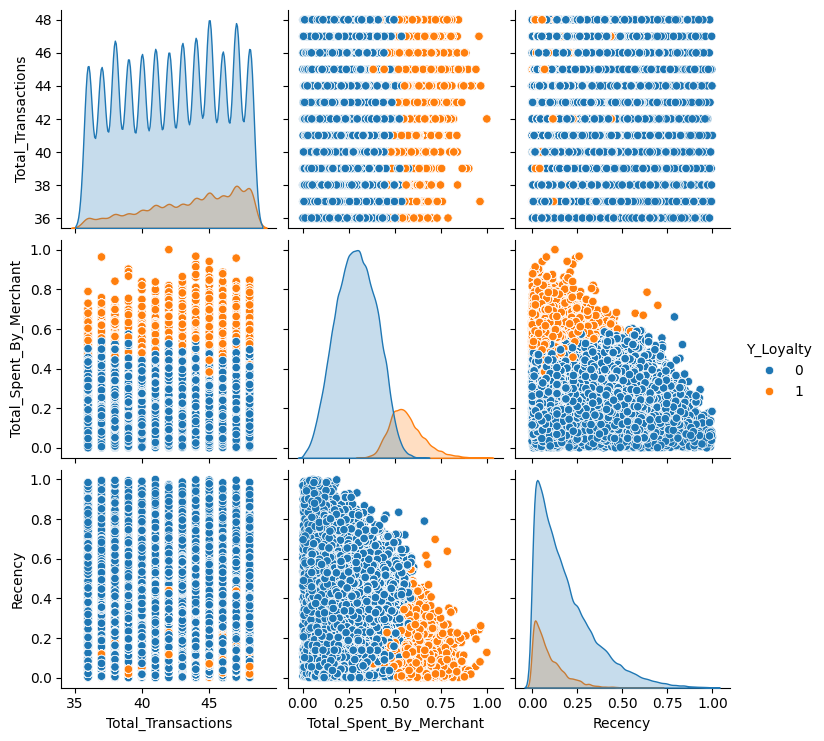

In [ ]:
# Scatter plots to check trends
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, vars=["Total_Transactions", "Total_Spent_By_Merchant", "Recency"], hue="Y_Loyalty")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE


# Load data
df_loyalty = pd.read_csv("final_dataset_with_loyalty_score.csv")

# Define features and target
features = ["Avg_Family_Income", "Avg_Family_Members", "Avg_Vehicles", "Dep_Score",
            "Transaction_Amount", "Recency", "Total_Transaction_Amount", "Avg_Transaction_Amount", "Total_Transactions"]

X = df_loyalty[features]
y = df_loyalty["Y_Loyalty"]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X, y = smote.fit_resample(X, y)


# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [3, 5, 8],  # Depth of each tree
    "learning_rate": [0.01, 0.05, 0.1],  # Step size shrinkage
    "subsample": [0.8, 1],  # % of data used per tree
    "colsample_bytree": [0.8, 1]  # % of features used per tree
}

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Perform Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Print best parameters & best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



# Get the best model
best_xgb = grid_search.best_estimator_

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))



Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:18:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.8}
Best Accuracy: 0.8101770036471969


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:18:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:18:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:19:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:19:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy Scores: [0.80418397 0.80680294 0.81013521 0.82019398 0.80956893]
Mean Accuracy: 0.8101770036471969
Standard Deviation: 0.005440809671774005


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load Data
df = pd.read_csv('/content/model3Loyalty.csv')
y = df['Y_Loyalty']

features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']
X = df[features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)  # Selecting top 6 features
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

# XGBoost Model with Hyperparameters from CV results
xgb_model = XGBClassifier(
    colsample_bytree=1,         # Based on CV results
    learning_rate=0.1,
    max_depth=8,
    n_estimators=300,
    subsample=0.8,
    alpha=0.5,
    random_state=42,
    eval_metric='auc',
    tree_method='hist'
)


xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],

    verbose=False
)


y_pred = xgb_model.predict(X_test)


print("\n=== XGBoost Loyalty Prediction Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))



=== XGBoost Loyalty Prediction Model ===
Accuracy: 0.8181186580126154
Confusion Matrix:
 [[36465  3021]
 [ 6927  8282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     39486
           1       0.73      0.54      0.62     15209

    accuracy                           0.82     54695
   macro avg       0.79      0.73      0.75     54695
weighted avg       0.81      0.82      0.81     54695

ROC-AUC Score: 0.8958779198891567


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load datasets
df_amount = pd.read_csv('/content/Transaction_Model_1_Amount (1).csv')
df_count = pd.read_csv('/content/Transaction_Model_2_Number (1).csv')

# Ensure 'Y' is the binary target variable
y_amount = df_amount['Y']
y_count = df_count['Y']

# Feature selection
features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']

X_amount = df_amount[features]
X_count = df_count[features]

# Train-test split with stratification
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(
    X_amount, y_amount, test_size=0.2, random_state=42, stratify=y_amount)

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    X_count, y_count, test_size=0.2, random_state=42, stratify=y_count)

# Standardize features
scaler = StandardScaler()
X_train_amount = scaler.fit_transform(X_train_amount)
X_test_amount = scaler.transform(X_test_amount)

X_train_count = scaler.fit_transform(X_train_count)
X_test_count = scaler.transform(X_test_count)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_amount, y_train_amount = smote.fit_resample(X_train_amount, y_train_amount)
X_train_count, y_train_count = smote.fit_resample(X_train_count, y_train_count)

# Feature Selection using SelectKBest (same as Loyalty Model)
k_best = SelectKBest(score_func=f_classif, k=6)  # Selecting top 6 features
X_train_amount = k_best.fit_transform(X_train_amount, y_train_amount)
X_test_amount = k_best.transform(X_test_amount)

X_train_count = k_best.fit_transform(X_train_count, y_train_count)
X_test_count = k_best.transform(X_test_count)

# Train an optimized XGBoost Model
xgb_model_amount = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=300,
    subsample=0.8,
    alpha=0.5,
    random_state=42,
    eval_metric='auc',
    tree_method='hist'
)
xgb_model_amount.fit(X_train_amount, y_train_amount)

xgb_model_count = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=300,
    subsample=0.8,
    alpha=0.5,
    random_state=42,
    eval_metric='auc',
    tree_method='hist'
)
xgb_model_count.fit(X_train_count, y_train_count)

# Make predictions
y_pred_xgb_amount = xgb_model_amount.predict(X_test_amount)
y_pred_xgb_count = xgb_model_count.predict(X_test_count)

# Evaluate models
print("\n=== Improved Transaction Amount Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_amount, y_pred_xgb_amount))
print("Confusion Matrix:\n", confusion_matrix(y_test_amount, y_pred_xgb_amount))
print("Classification Report:\n", classification_report(y_test_amount, y_pred_xgb_amount))
print("ROC-AUC Score:", roc_auc_score(y_test_amount, xgb_model_amount.predict_proba(X_test_amount)[:,1]))

print("\n=== Improved Transaction Count Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_count, y_pred_xgb_count))
print("Confusion Matrix:\n", confusion_matrix(y_test_count, y_pred_xgb_count))
print("Classification Report:\n", classification_report(y_test_count, y_pred_xgb_count))
print("ROC-AUC Score:", roc_auc_score(y_test_count, xgb_model_count.predict_proba(X_test_count)[:,1]))



=== Improved Transaction Amount Model (XGBoost) ===
Accuracy: 0.7393363195904562
Confusion Matrix:
 [[19002  7766]
 [ 6491 21436]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     26768
           1       0.73      0.77      0.75     27927

    accuracy                           0.74     54695
   macro avg       0.74      0.74      0.74     54695
weighted avg       0.74      0.74      0.74     54695

ROC-AUC Score: 0.8222727745641865

=== Improved Transaction Count Model (XGBoost) ===
Accuracy: 0.7613675838742116
Confusion Matrix:
 [[18899  7277]
 [ 5775 22744]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74     26176
           1       0.76      0.80      0.78     28519

    accuracy                           0.76     54695
   macro avg       0.76      0.76      0.76     54695
weighted avg       0.76      0.76      0.76     54695

R

In [ ]:
# running a 5 fold Cross validation on the Transaction AMount and the Count of transaction model to get the best hyperparameters for tuning to the best accuracy


import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


df_amount = pd.read_csv('/content/Transaction_Model_1_Amount (1).csv')
df_count = pd.read_csv('/content/Transaction_Model_2_Number (1).csv')


features = ["Avg_Family_Income", "Avg_Family_Members", "Avg_Vehicles", "Dep_Score",
            "Transaction_Amount", "Recency", "Total_Transaction_Amount", "Avg_Transaction_Amount", "Total_Transactions"]

X_amount = df_amount[features]
y_amount = df_amount["Y"]

X_count = df_count[features]
y_count = df_count["Y"]


scaler = StandardScaler()
X_amount = scaler.fit_transform(X_amount)
X_count = scaler.fit_transform(X_count)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_amount, y_amount = smote.fit_resample(X_amount, y_amount)
X_count, y_count = smote.fit_resample(X_count, y_count)

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [3, 5, 8],  # Depth of each tree
    "learning_rate": [0.01, 0.05, 0.1],  # Step size shrinkage
    "subsample": [0.8, 1],  # % of data used per tree
    "colsample_bytree": [0.8, 1]  # % of features used per tree
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")

# Perform Grid Search with 5-Fold Cross-Validation for Transaction Amount Model
print("\n=== Grid Search for Transaction Amount Model ===")
grid_search_amount = GridSearchCV(xgb_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search_amount.fit(X_amount, y_amount)

print("Best Parameters (Amount Model):", grid_search_amount.best_params_)
print("Best Accuracy (Amount Model):", grid_search_amount.best_score_)

# Get the best model for Transaction Amount
best_xgb_amount = grid_search_amount.best_estimator_

# Perform 5-Fold Cross-Validation for the best model
cv_scores_amount = cross_val_score(best_xgb_amount, X_amount, y_amount, cv=5, scoring="accuracy")

print("\n=== Cross-Validation for Transaction Amount Model ===")
print("Cross-Validation Accuracy Scores:", cv_scores_amount)
print("Mean Accuracy:", np.mean(cv_scores_amount))
print("Standard Deviation:", np.std(cv_scores_amount))


# Perform Grid Search with 5-Fold Cross-Validation for Transaction Count Model
print("\n=== Grid Search for Transaction Count Model ===")
grid_search_count = GridSearchCV(xgb_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search_count.fit(X_count, y_count)

# Print best parameters & accuracy for Transaction Count Model
print("Best Parameters (Count Model):", grid_search_count.best_params_)
print("Best Accuracy (Count Model):", grid_search_count.best_score_)

# Get the best model for Transaction Count
best_xgb_count = grid_search_count.best_estimator_

# Perform 5-Fold Cross-Validation for the best model
cv_scores_count = cross_val_score(best_xgb_count, X_count, y_count, cv=5, scoring="accuracy")

print("\n=== Cross-Validation for Transaction Count Model ===")
print("Cross-Validation Accuracy Scores:", cv_scores_count)
print("Mean Accuracy:", np.mean(cv_scores_count))
print("Standard Deviation:", np.std(cv_scores_count))



=== Grid Search for Transaction Amount Model ===
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (Amount Model): {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best Accuracy (Amount Model): 0.6265925529590499

=== Cross-Validation for Transaction Amount Model ===
Cross-Validation Accuracy Scores: [0.63069789 0.62270603 0.62071867 0.63146116 0.62737901]
Mean Accuracy: 0.6265925529590499
Standard Deviation: 0.0042610596003698886

=== Grid Search for Transaction Count Model ===
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (Count Model): {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best Accuracy (Count Model): 0.6096259345016748

=== Cross-Validation for Transaction Count Model ===
Cross-Validation Accuracy Scores: [0.61267927 0.60885725 0.60633262 0.60606273 0.6141978 ]
Mean Accuracy: 0.6096259345016748
Standard Dev

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load datasets
df_amount = pd.read_csv('/content/Transaction_Model_1_Amount (1).csv')
df_count = pd.read_csv('/content/Transaction_Model_2_Number (1).csv')

# Ensure 'Y' is the binary target variable
y_amount = df_amount['Y']
y_count = df_count['Y']

# Feature selection
features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']

X_amount = df_amount[features]
X_count = df_count[features]

# Train-test split with stratification
X_train_amount, X_test_amount, y_train_amount, y_test_amount = train_test_split(
    X_amount, y_amount, test_size=0.2, random_state=42, stratify=y_amount)

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    X_count, y_count, test_size=0.2, random_state=42, stratify=y_count)

# Standardize features
scaler = StandardScaler()
X_train_amount = scaler.fit_transform(X_train_amount)
X_test_amount = scaler.transform(X_test_amount)

X_train_count = scaler.fit_transform(X_train_count)
X_test_count = scaler.transform(X_test_count)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_amount, y_train_amount = smote.fit_resample(X_train_amount, y_train_amount)
X_train_count, y_train_count = smote.fit_resample(X_train_count, y_train_count)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)
X_train_amount = k_best.fit_transform(X_train_amount, y_train_amount)
X_test_amount = k_best.transform(X_test_amount)

X_train_count = k_best.fit_transform(X_train_count, y_train_count)
X_test_count = k_best.transform(X_test_count)

# Train an optimized XGBoost Model
xgb_model_amount = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=400,
    subsample=0.8,
    alpha=0.5,
    random_state=42,
    eval_metric='auc',
    tree_method='hist'
)
xgb_model_amount.fit(X_train_amount, y_train_amount)

xgb_model_count = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=8,
    n_estimators=400,
    subsample=0.8,
    alpha=0.5,
    random_state=42,
    eval_metric='auc',
    tree_method='hist'
)
xgb_model_count.fit(X_train_count, y_train_count)

# Make predictions
y_pred_xgb_amount = xgb_model_amount.predict(X_test_amount)
y_pred_xgb_count = xgb_model_count.predict(X_test_count)

# Evaluate models
print("\n=== Optimized Transaction Amount Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_amount, y_pred_xgb_amount))
print("Confusion Matrix:\n", confusion_matrix(y_test_amount, y_pred_xgb_amount))
print("Classification Report:\n", classification_report(y_test_amount, y_pred_xgb_amount))
print("ROC-AUC Score:", roc_auc_score(y_test_amount, xgb_model_amount.predict_proba(X_test_amount)[:,1]))

print("\n=== Optimized Transaction Count Model (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test_count, y_pred_xgb_count))
print("Confusion Matrix:\n", confusion_matrix(y_test_count, y_pred_xgb_count))
print("Classification Report:\n", classification_report(y_test_count, y_pred_xgb_count))
print("ROC-AUC Score:", roc_auc_score(y_test_count, xgb_model_count.predict_proba(X_test_count)[:,1]))

# Perform Cross-Validation
cv_scores_amount = cross_val_score(xgb_model_amount, X_train_amount, y_train_amount, cv=5, scoring='accuracy')
cv_scores_count = cross_val_score(xgb_model_count, X_train_count, y_train_count, cv=5, scoring='accuracy')

print("\n=== Cross-Validation Results ===")
print("Transaction Amount Model: Mean Accuracy =", np.mean(cv_scores_amount), "| Std Dev =", np.std(cv_scores_amount))
print("Transaction Count Model: Mean Accuracy =", np.mean(cv_scores_count), "| Std Dev =", np.std(cv_scores_count))



=== Optimized Transaction Amount Model (XGBoost) ===
Accuracy: 0.7533778224700612
Confusion Matrix:
 [[19382  7386]
 [ 6103 21824]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74     26768
           1       0.75      0.78      0.76     27927

    accuracy                           0.75     54695
   macro avg       0.75      0.75      0.75     54695
weighted avg       0.75      0.75      0.75     54695

ROC-AUC Score: 0.8373900094882759

=== Optimized Transaction Count Model (XGBoost) ===
Accuracy: 0.7765243623731602
Confusion Matrix:
 [[19454  6722]
 [ 5501 23018]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76     26176
           1       0.77      0.81      0.79     28519

    accuracy                           0.78     54695
   macro avg       0.78      0.78      0.78     54695
weighted avg       0.78      0.78      0.78     54695


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load Data
df = pd.read_csv('/content/final_dataset_with_loyalty_score.csv')
y = df['Y_Loyalty']

features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']
X = df[features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE (before splitting)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)  # Selecting top 6 features
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

# XGBoost Model with Hyperparameters from CV results
xgb_model = XGBClassifier(
    colsample_bytree=1,         # Based on CV results
    learning_rate=0.1,
    max_depth=8,
    n_estimators=300,
    subsample=0.8,
    alpha=0.5,
    random_state=42,
    eval_metric='auc',
    tree_method='hist'
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
print("\n=== XGBoost Loyalty Prediction Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))



=== XGBoost Loyalty Prediction Model ===
Accuracy: 0.8715532843606941
Confusion Matrix:
 [[37576  9389]
 [ 2676 44289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     46965
           1       0.83      0.94      0.88     46965

    accuracy                           0.87     93930
   macro avg       0.88      0.87      0.87     93930
weighted avg       0.88      0.87      0.87     93930

ROC-AUC Score: 0.9357443239198278


In [ ]:
import numpy as np

fake_record = np.array([[50000, 3, 2, 120000, 562.42, 1, 25000, 1000, 44]])

fake_record_scaled = scaler.transform(fake_record)

fake_record_selected = k_best.transform(fake_record_scaled)

predicted_class = xgb_model.predict(fake_record_selected)
predicted_proba = xgb_model.predict_proba(fake_record_selected)[:, 1]

print("\n=== Fake Record Prediction ===")
print("Predicted Class:", predicted_class[0])
print("Predicted Probability of Class 1:", predicted_proba[0])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NotFittedError: need to call fit or load_model beforehand

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load Data
df = pd.read_csv('/content/model3Loyalty.csv')
y = df['Y_Loyalty']

features = ['Avg_Family_Income', 'Avg_Family_Members', 'Avg_Vehicles', 'Dep_Score',
            'Transaction_Amount', 'Recency', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Total_Transactions']
X = df[features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=6)  # Selecting top 6 features
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

# XGBoost Model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='auc',
    tree_method='hist'
)

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 6, 7, 8],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'alpha': [0.1, 0.3, 0.5]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',  # Focus on recall for class 1
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

print("\n=== XGBoost Loyalty Prediction Model ===")
print("Accuracy:", grid_search.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
